# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting accuracy along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

Note: Assignment code on bottom

In [3]:
!pip3 install tensorflow keras

     ---------------------------------------- 1.7/1.7 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 276.5/276.5 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 440.8/440.8 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 181.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl (276.5 MB)


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD  #Stochastic Gradient Descent

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

In [6]:
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

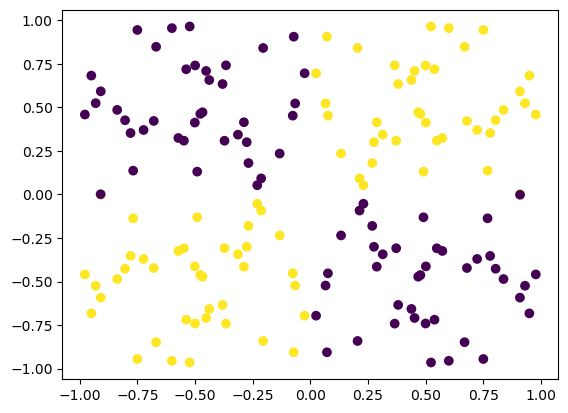

In [7]:
plt.scatter(*zip(*X), c=y)

In [20]:
model = Sequential()

model.add(Dense(2, input_dim=2, activation='tanh'))  #sigmoid, relu
# model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1,input_dim=2, activation='sigmoid'))


sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
print(model.predict.reshape(4*n)) # used predict instead of predict_proba 
# see https://stackoverflow.com/questions/68971378/attributeerror-sequential-object-has-no-attribute-predict-proba

# evaluate the model
scores = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 1s 3ms/step - loss: 0.6964
Epoch 2/400
80/80 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 3/400
80/80 [==============================] - 0s 2ms/step - loss: 0.6960
Epoch 4/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6957
Epoch 5/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6956
Epoch 6/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6954
Epoch 7/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6952
Epoch 8/400
80/80 [==============================] - 0s 2ms/step - loss: 0.6952
Epoch 9/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6951
Epoch 10/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6950
Epoch 11/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6949
Epoch 12/400
80/80 [==============================] - 0s 5ms/step - loss: 0.6950
Epoch 13/400
80/80 [=================

80/80 [==============================] - 0s 3ms/step - loss: 0.6664
Epoch 103/400
80/80 [==============================] - 0s 2ms/step - loss: 0.6650
Epoch 104/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6637
Epoch 105/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6622
Epoch 106/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6605
Epoch 107/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6592
Epoch 108/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6576
Epoch 109/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6562
Epoch 110/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6546
Epoch 111/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6528
Epoch 112/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6514
Epoch 113/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6495
Epoch 114/400
80/80 [=========

80/80 [==============================] - 0s 3ms/step - loss: 0.3762
Epoch 203/400
80/80 [==============================] - 0s 3ms/step - loss: 0.3744
Epoch 204/400
80/80 [==============================] - 0s 2ms/step - loss: 0.3726
Epoch 205/400
80/80 [==============================] - 0s 2ms/step - loss: 0.3713
Epoch 206/400
80/80 [==============================] - 0s 3ms/step - loss: 0.3697
Epoch 207/400
80/80 [==============================] - 0s 2ms/step - loss: 0.3680
Epoch 208/400
80/80 [==============================] - 0s 3ms/step - loss: 0.3665
Epoch 209/400
80/80 [==============================] - 0s 3ms/step - loss: 0.3651
Epoch 210/400
80/80 [==============================] - 0s 2ms/step - loss: 0.3638
Epoch 211/400
80/80 [==============================] - 0s 2ms/step - loss: 0.3622
Epoch 212/400
80/80 [==============================] - 0s 3ms/step - loss: 0.3609
Epoch 213/400
80/80 [==============================] - 0s 3ms/step - loss: 0.3597
Epoch 214/400
80/80 [=========

80/80 [==============================] - 0s 3ms/step - loss: 0.3243
Epoch 303/400
80/80 [==============================] - 0s 4ms/step - loss: 0.3240
Epoch 304/400
80/80 [==============================] - 0s 3ms/step - loss: 0.3234
Epoch 305/400
80/80 [==============================] - 0s 2ms/step - loss: 0.3241
Epoch 306/400
80/80 [==============================] - 0s 2ms/step - loss: 0.3240
Epoch 307/400
80/80 [==============================] - 0s 2ms/step - loss: 0.3238
Epoch 308/400
80/80 [==============================] - 0s 2ms/step - loss: 0.3234
Epoch 309/400
80/80 [==============================] - 0s 3ms/step - loss: 0.3236
Epoch 310/400
80/80 [==============================] - 0s 3ms/step - loss: 0.3238
Epoch 311/400
80/80 [==============================] - 0s 4ms/step - loss: 0.3235
Epoch 312/400
80/80 [==============================] - 0s 3ms/step - loss: 0.3237
Epoch 313/400
80/80 [==============================] - 0s 3ms/step - loss: 0.3235
Epoch 314/400
80/80 [=========

AttributeError: 'function' object has no attribute 'reshape'

In [19]:
print(model.predict(X).reshape(4*n))


5/5 [==============================] - 0s 2ms/step
[0.8355127  0.7765007  0.9298436  0.85669655 0.6237531  0.9391505
 0.95061105 0.1143573  0.9502729  0.92214805 0.9143126  0.8356193
 0.9181344  0.7193851  0.9485295  0.0904222  0.94639593 0.91611516
 0.80542094 0.27305105 0.8496465  0.911798   0.93654794 0.9200971
 0.8857141  0.9512584  0.73454875 0.93523055 0.939043   0.9548084
 0.32836515 0.84769917 0.95236665 0.95457876 0.8313433  0.8590759
 0.37922475 0.95466554 0.9170596  0.954739   0.82183325 0.7887128
 0.92182875 0.86914414 0.6264978  0.93273246 0.9529015  0.11752616
 0.9527089  0.913017   0.9228968  0.8484593  0.908549   0.70913935
 0.944419   0.09029885 0.94994783 0.9062634  0.8181141  0.28587472
 0.83570176 0.920561   0.9421417  0.92804164 0.8966751  0.9481068
 0.72293806 0.92801195 0.9325671  0.95440173 0.34061813 0.86056095
 0.95399374 0.9547104  0.81739324 0.8713695  0.36657026 0.9536279
 0.9253642  0.95387447 0.573124   0.05316661 0.05567899 0.05623674
 0.04316653 0.04680

In [10]:
scores = model.evaluate(X, y)
scores, model.metrics_names

5/5 [==============================] - 0s 6ms/step - loss: 0.3171


(0.31705933809280396, ['loss'])

5/5 [==============================] - 0s 6ms/step


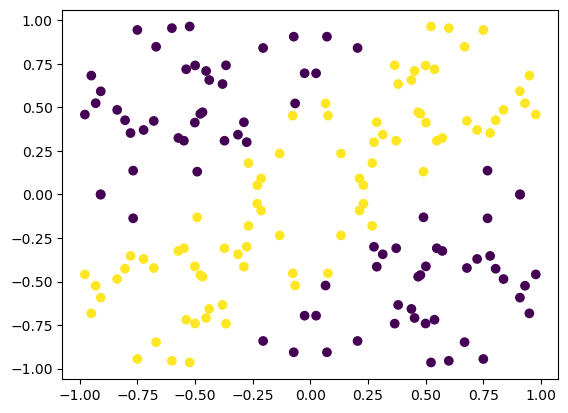

In [23]:
plt.scatter(*zip(*X), c=model.predict(X) > 0.5)
# error when using original code of predict_classes
# referenced https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes

5/5 [==============================] - 0s 3ms/step


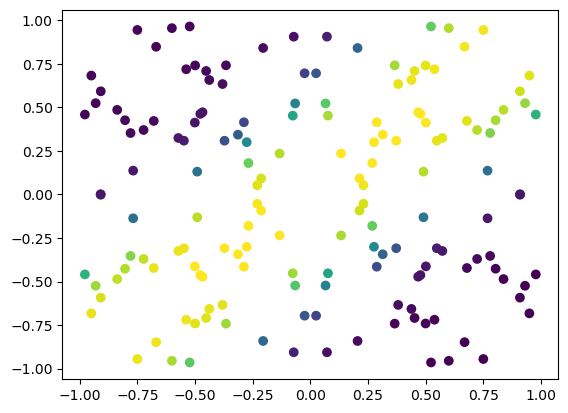

In [13]:
plt.scatter(*zip(*X), c=model.predict(X))

## Using Diabetes data 

http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

In [129]:
# load pima indians dataset
dataset = numpy.loadtxt("../../data/pima-indians-diabetes.data", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [136]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=1000, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1000
768/768 [==============================] - 1s - loss: 0.6821 - acc: 0.5820     
Epoch 2/1000
768/768 [==============================] - 0s - loss: 0.6273 - acc: 0.6536     
Epoch 3/1000
768/768 [==============================] - 0s - loss: 0.6122 - acc: 0.6719     
Epoch 4/1000
768/768 [==============================] - 0s - loss: 0.6111 - acc: 0.6680     
Epoch 5/1000
768/768 [==============================] - 0s - loss: 0.6065 - acc: 0.6862     
Epoch 6/1000
768/768 [==============================] - 0s - loss: 0.6049 - acc: 0.6745     
Epoch 7/1000
768/768 [==============================] - 0s - loss: 0.5978 - acc: 0.6810     
Epoch 8/1000
768/768 [==============================] - 0s - loss: 0.5961 - acc: 0.6823     
Epoch 9/1000
768/768 [==============================] - 0s - loss: 0.5927 - acc: 0.6966     
Epoch 10/1000
768/768 [==============================] - 0s - loss: 0.5906 - acc: 0.6953     
Epoch 11/1000
768/768 [==============================] - 0s - loss: 0

768/768 [==============================] - 0s - loss: 0.5103 - acc: 0.7539     
Epoch 175/1000
768/768 [==============================] - 0s - loss: 0.5135 - acc: 0.7565     
Epoch 176/1000
768/768 [==============================] - 0s - loss: 0.5115 - acc: 0.7552     
Epoch 177/1000
768/768 [==============================] - 0s - loss: 0.5084 - acc: 0.7500     
Epoch 178/1000
768/768 [==============================] - 0s - loss: 0.5079 - acc: 0.7591     
Epoch 179/1000
768/768 [==============================] - 0s - loss: 0.5088 - acc: 0.7591     
Epoch 180/1000
768/768 [==============================] - 0s - loss: 0.5059 - acc: 0.7630     
Epoch 181/1000
768/768 [==============================] - 0s - loss: 0.5171 - acc: 0.7409     
Epoch 182/1000
768/768 [==============================] - 0s - loss: 0.5123 - acc: 0.7435     
Epoch 183/1000
768/768 [==============================] - 0s - loss: 0.5168 - acc: 0.7526     
Epoch 184/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4906 - acc: 0.7656     
Epoch 347/1000
768/768 [==============================] - 0s - loss: 0.4924 - acc: 0.7734     
Epoch 348/1000
768/768 [==============================] - 0s - loss: 0.4848 - acc: 0.7734     
Epoch 349/1000
768/768 [==============================] - 0s - loss: 0.4895 - acc: 0.7669     
Epoch 350/1000
768/768 [==============================] - 0s - loss: 0.4924 - acc: 0.7656     
Epoch 351/1000
768/768 [==============================] - 0s - loss: 0.4906 - acc: 0.7643     
Epoch 352/1000
768/768 [==============================] - 0s - loss: 0.4851 - acc: 0.7747     
Epoch 353/1000
768/768 [==============================] - 0s - loss: 0.4825 - acc: 0.7747     
Epoch 354/1000
768/768 [==============================] - 0s - loss: 0.4781 - acc: 0.7786     
Epoch 355/1000
768/768 [==============================] - 0s - loss: 0.4828 - acc: 0.7656     
Epoch 356/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4801 - acc: 0.7760     
Epoch 519/1000
768/768 [==============================] - 0s - loss: 0.4730 - acc: 0.7760     
Epoch 520/1000
768/768 [==============================] - 0s - loss: 0.4705 - acc: 0.7865     
Epoch 521/1000
768/768 [==============================] - 0s - loss: 0.4742 - acc: 0.7734     
Epoch 522/1000
768/768 [==============================] - 0s - loss: 0.4693 - acc: 0.7878     
Epoch 523/1000
768/768 [==============================] - 0s - loss: 0.4825 - acc: 0.7630     
Epoch 524/1000
768/768 [==============================] - 0s - loss: 0.4787 - acc: 0.7812     
Epoch 525/1000
768/768 [==============================] - 0s - loss: 0.4712 - acc: 0.7865     
Epoch 526/1000
768/768 [==============================] - 0s - loss: 0.4652 - acc: 0.7878     
Epoch 527/1000
768/768 [==============================] - 0s - loss: 0.4686 - acc: 0.7891     
Epoch 528/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4566 - acc: 0.7812     
Epoch 691/1000
768/768 [==============================] - 0s - loss: 0.4701 - acc: 0.7773     
Epoch 692/1000
768/768 [==============================] - 0s - loss: 0.4743 - acc: 0.7799     
Epoch 693/1000
768/768 [==============================] - 0s - loss: 0.4768 - acc: 0.7773     
Epoch 694/1000
768/768 [==============================] - 0s - loss: 0.4626 - acc: 0.7878     
Epoch 695/1000
768/768 [==============================] - 0s - loss: 0.4622 - acc: 0.7904     
Epoch 696/1000
768/768 [==============================] - 0s - loss: 0.4624 - acc: 0.7826     
Epoch 697/1000
768/768 [==============================] - 0s - loss: 0.4634 - acc: 0.7917     
Epoch 698/1000
768/768 [==============================] - 0s - loss: 0.4624 - acc: 0.7813     
Epoch 699/1000
768/768 [==============================] - 0s - loss: 0.4590 - acc: 0.7917     
Epoch 700/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4636 - acc: 0.7865     
Epoch 863/1000
768/768 [==============================] - 0s - loss: 0.4605 - acc: 0.7839     
Epoch 864/1000
768/768 [==============================] - 0s - loss: 0.4657 - acc: 0.7773     
Epoch 865/1000
768/768 [==============================] - 0s - loss: 0.4735 - acc: 0.7669     
Epoch 866/1000
768/768 [==============================] - 0s - loss: 0.4608 - acc: 0.7904     
Epoch 867/1000
768/768 [==============================] - 0s - loss: 0.4640 - acc: 0.7956     
Epoch 868/1000
768/768 [==============================] - 0s - loss: 0.4449 - acc: 0.7969     
Epoch 869/1000
768/768 [==============================] - 0s - loss: 0.4544 - acc: 0.7812     
Epoch 870/1000
768/768 [==============================] - 0s - loss: 0.4624 - acc: 0.7839     
Epoch 871/1000
768/768 [==============================] - 0s - loss: 0.4663 - acc: 0.7760     
Epoch 872/1000
768/768 [==============================] - 0s - lo

# Part 1 - XOR

Using the XOR dataset below, train (400 epochs) a neural network (NN) using 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting accuracy along with n. Plot the results to find what the optimal number of layers is.

Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?

Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?

Using the most optimal configuraion (n-layers, k-neurons per layer), compare how tanh, sigmoid,softplus and relu effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)

Again with the most optimal setup, try other optimizers (instead of SGD) and report on the loss score. (https://keras.io/optimizers/)

In [24]:
# use the original data
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

In [55]:
# 2 neurons
num_layers = [1,2,3,4,5]
scores = []

model = Sequential()
num_layer = 1

for num_layer in num_layers:
    
    # build model and evaluate
    # hidden layer 1
    model.add(Dense(2, input_dim = 2, activation = 'tanh'))
    if num_layer == 5:
        # hidden layer 2 - 5
        model.add(Dense(2, input_dim = 2, activation = 'tanh'))    
        model.add(Dense(2, input_dim = 2, activation = 'tanh'))
        model.add(Dense(2, input_dim = 2, activation = 'tanh'))   
        model.add(Dense(2, input_dim = 2, activation = 'tanh'))
    elif num_layer == 4:
        model.add(Dense(2, input_dim = 2, activation = 'tanh'))
        model.add(Dense(2, input_dim = 2, activation = 'tanh'))
        model.add(Dense(2, input_dim = 2, activation = 'tanh'))
    elif num_layer == 3:
        model.add(Dense(2, input_dim = 2, activation = 'tanh'))
        model.add(Dense(2, input_dim = 2, activation = 'tanh'))
    elif num_layer == 2:
        model.add(Dense(2, input_dim = 2, activation = 'tanh'))

    # train model
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd')

    model.fit(X, y, batch_size=2, epochs=400)
    
    score = model.evaluate(X, y)
    scores.append(score)
    
    num_layer += 1


Epoch 1/400
80/80 [==============================] - 1s 3ms/step - loss: 4.0584
Epoch 2/400
80/80 [==============================] - 0s 4ms/step - loss: 4.0406
Epoch 3/400
80/80 [==============================] - 0s 4ms/step - loss: 4.0347
Epoch 4/400
80/80 [==============================] - 0s 4ms/step - loss: 4.0287
Epoch 5/400
80/80 [==============================] - 0s 4ms/step - loss: 4.0274
Epoch 6/400
80/80 [==============================] - 0s 4ms/step - loss: 4.0229
Epoch 7/400
80/80 [==============================] - 0s 4ms/step - loss: 4.0183
Epoch 8/400
80/80 [==============================] - 0s 4ms/step - loss: 4.0225
Epoch 9/400
80/80 [==============================] - 0s 4ms/step - loss: 4.0193
Epoch 10/400
80/80 [==============================] - 0s 3ms/step - loss: 4.0167
Epoch 11/400
80/80 [==============================] - 0s 3ms/step - loss: 4.0168
Epoch 12/400
80/80 [==============================] - 0s 4ms/step - loss: 4.0208
Epoch 13/400
80/80 [=================

80/80 [==============================] - 0s 4ms/step - loss: 2.3881
Epoch 103/400
80/80 [==============================] - 0s 4ms/step - loss: 2.3849
Epoch 104/400
80/80 [==============================] - 0s 4ms/step - loss: 2.3834
Epoch 105/400
80/80 [==============================] - 0s 4ms/step - loss: 2.3840
Epoch 106/400
80/80 [==============================] - 0s 3ms/step - loss: 2.3844
Epoch 107/400
80/80 [==============================] - 0s 3ms/step - loss: 2.3840
Epoch 108/400
80/80 [==============================] - 0s 3ms/step - loss: 2.2778
Epoch 109/400
80/80 [==============================] - 0s 3ms/step - loss: 2.1092
Epoch 110/400
80/80 [==============================] - 0s 3ms/step - loss: 1.2203
Epoch 111/400
80/80 [==============================] - 0s 3ms/step - loss: 0.8506
Epoch 112/400
80/80 [==============================] - 0s 3ms/step - loss: 0.7958
Epoch 113/400
80/80 [==============================] - 0s 4ms/step - loss: 0.7562
Epoch 114/400
80/80 [=========

80/80 [==============================] - 0s 3ms/step - loss: 0.6974
Epoch 203/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6978
Epoch 204/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6971
Epoch 205/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6972
Epoch 206/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6976
Epoch 207/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6976
Epoch 208/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6977
Epoch 209/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6957
Epoch 210/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6976
Epoch 211/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6974
Epoch 212/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6969
Epoch 213/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6973
Epoch 214/400
80/80 [=========

80/80 [==============================] - 0s 4ms/step - loss: 0.6978
Epoch 303/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6973
Epoch 304/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6977
Epoch 305/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6968
Epoch 306/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6963
Epoch 307/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6980
Epoch 308/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6979
Epoch 309/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6975
Epoch 310/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6975
Epoch 311/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6972
Epoch 312/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6973
Epoch 313/400
80/80 [==============================] - 0s 2ms/step - loss: 0.6977
Epoch 314/400
80/80 [=========

80/80 [==============================] - 1s 2ms/step - loss: 4.2057
Epoch 2/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2052
Epoch 3/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2067
Epoch 4/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2045
Epoch 5/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2065
Epoch 6/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2063
Epoch 7/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2064
Epoch 8/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2038
Epoch 9/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2063
Epoch 10/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2058
Epoch 11/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2057
Epoch 12/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2047
Epoch 13/400
80/80 [=============================

80/80 [==============================] - 0s 2ms/step - loss: 4.1685
Epoch 103/400
80/80 [==============================] - 0s 2ms/step - loss: 4.1683
Epoch 104/400
80/80 [==============================] - 0s 2ms/step - loss: 4.1679
Epoch 105/400
80/80 [==============================] - 0s 4ms/step - loss: 4.1673
Epoch 106/400
80/80 [==============================] - 0s 4ms/step - loss: 4.1672
Epoch 107/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1672
Epoch 108/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1659
Epoch 109/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1667
Epoch 110/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1661
Epoch 111/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1659
Epoch 112/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1650
Epoch 113/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1659
Epoch 114/400
80/80 [=========

80/80 [==============================] - 0s 3ms/step - loss: 4.1536
Epoch 203/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1539
Epoch 204/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1546
Epoch 205/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1549
Epoch 206/400
80/80 [==============================] - 0s 2ms/step - loss: 4.1532
Epoch 207/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1544
Epoch 208/400
80/80 [==============================] - 0s 2ms/step - loss: 4.1540
Epoch 209/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1530
Epoch 210/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1545
Epoch 211/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1532
Epoch 212/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1534
Epoch 213/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1529
Epoch 214/400
80/80 [=========

80/80 [==============================] - 0s 2ms/step - loss: 4.1498
Epoch 303/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1497
Epoch 304/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1485
Epoch 305/400
80/80 [==============================] - 0s 2ms/step - loss: 4.1496
Epoch 306/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1496
Epoch 307/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1497
Epoch 308/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1488
Epoch 309/400
80/80 [==============================] - 0s 2ms/step - loss: 4.1491
Epoch 310/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1468
Epoch 311/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1491
Epoch 312/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1489
Epoch 313/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1486
Epoch 314/400
80/80 [=========

80/80 [==============================] - 2s 3ms/step - loss: 4.2251
Epoch 2/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1693
Epoch 3/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1256
Epoch 4/400
80/80 [==============================] - 0s 3ms/step - loss: 4.0969
Epoch 5/400
80/80 [==============================] - 0s 3ms/step - loss: 4.0805
Epoch 6/400
80/80 [==============================] - 0s 3ms/step - loss: 4.0745
Epoch 7/400
80/80 [==============================] - 0s 3ms/step - loss: 4.0746
Epoch 8/400
80/80 [==============================] - 0s 3ms/step - loss: 4.0694
Epoch 9/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1039
Epoch 10/400
80/80 [==============================] - 0s 3ms/step - loss: 4.0613
Epoch 11/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1029
Epoch 12/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1044
Epoch 13/400
80/80 [=============================

80/80 [==============================] - 0s 3ms/step - loss: 4.1521
Epoch 103/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1590
Epoch 104/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1813
Epoch 105/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1711
Epoch 106/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1573
Epoch 107/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1527
Epoch 108/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1523
Epoch 109/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1503
Epoch 110/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1522
Epoch 111/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1515
Epoch 112/400
80/80 [==============================] - 0s 4ms/step - loss: 4.1503
Epoch 113/400
80/80 [==============================] - 0s 3ms/step - loss: 4.1498
Epoch 114/400
80/80 [=========

80/80 [==============================] - 0s 3ms/step - loss: 4.2066
Epoch 203/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2062
Epoch 204/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2071
Epoch 205/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2068
Epoch 206/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2065
Epoch 207/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2058
Epoch 208/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2072
Epoch 209/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2064
Epoch 210/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2060
Epoch 211/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2055
Epoch 212/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2031
Epoch 213/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2067
Epoch 214/400
80/80 [=========

80/80 [==============================] - 0s 3ms/step - loss: 4.2063
Epoch 303/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2058
Epoch 304/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2049
Epoch 305/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2072
Epoch 306/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2068
Epoch 307/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2062
Epoch 308/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2055
Epoch 309/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2061
Epoch 310/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2056
Epoch 311/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2071
Epoch 312/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2075
Epoch 313/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2065
Epoch 314/400
80/80 [=========

80/80 [==============================] - 2s 4ms/step - loss: 0.7388
Epoch 2/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6964
Epoch 3/400
80/80 [==============================] - 0s 4ms/step - loss: 0.7014
Epoch 4/400
80/80 [==============================] - 0s 4ms/step - loss: 0.7010
Epoch 5/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6975
Epoch 6/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6985
Epoch 7/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6979
Epoch 8/400
80/80 [==============================] - 0s 3ms/step - loss: 0.7011
Epoch 9/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6987
Epoch 10/400
80/80 [==============================] - 0s 4ms/step - loss: 0.7012
Epoch 11/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6914
Epoch 12/400
80/80 [==============================] - 0s 4ms/step - loss: 0.7017
Epoch 13/400
80/80 [=============================

80/80 [==============================] - 0s 3ms/step - loss: 0.6970
Epoch 103/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6976
Epoch 104/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6978
Epoch 105/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6985
Epoch 106/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6966
Epoch 107/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6957
Epoch 108/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6983
Epoch 109/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6956
Epoch 110/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6972
Epoch 111/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6986
Epoch 112/400
80/80 [==============================] - 0s 5ms/step - loss: 0.6973
Epoch 113/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6975
Epoch 114/400
80/80 [=========

80/80 [==============================] - 0s 3ms/step - loss: 0.6984
Epoch 203/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6942
Epoch 204/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6983
Epoch 205/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6981
Epoch 206/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6979
Epoch 207/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6964
Epoch 208/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6956
Epoch 209/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6974
Epoch 210/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6973
Epoch 211/400
80/80 [==============================] - 0s 2ms/step - loss: 0.6975
Epoch 212/400
80/80 [==============================] - 0s 3ms/step - loss: 0.6975
Epoch 213/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6981
Epoch 214/400
80/80 [=========

80/80 [==============================] - 0s 4ms/step - loss: 0.6985
Epoch 303/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6970
Epoch 304/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6966
Epoch 305/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6974
Epoch 306/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6977
Epoch 307/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6972
Epoch 308/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6979
Epoch 309/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6960
Epoch 310/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6983
Epoch 311/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6982
Epoch 312/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6963
Epoch 313/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6968
Epoch 314/400
80/80 [=========

80/80 [==============================] - 2s 3ms/step - loss: 4.2288
Epoch 2/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2051
Epoch 3/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2046
Epoch 4/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2052
Epoch 5/400
80/80 [==============================] - 0s 5ms/step - loss: 4.2054
Epoch 6/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2051
Epoch 7/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2042
Epoch 8/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2038
Epoch 9/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2054
Epoch 10/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2043
Epoch 11/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2054
Epoch 12/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2053
Epoch 13/400
80/80 [=============================

80/80 [==============================] - 0s 4ms/step - loss: 4.2054
Epoch 103/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2049
Epoch 104/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2041
Epoch 105/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2052
Epoch 106/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2051
Epoch 107/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2040
Epoch 108/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2048
Epoch 109/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2046
Epoch 110/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2051
Epoch 111/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2043
Epoch 112/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2049
Epoch 113/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2044
Epoch 114/400
80/80 [=========

80/80 [==============================] - 0s 4ms/step - loss: 4.2049
Epoch 203/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2049
Epoch 204/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2048
Epoch 205/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2051
Epoch 206/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2044
Epoch 207/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2044
Epoch 208/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2049
Epoch 209/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2048
Epoch 210/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2041
Epoch 211/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2045
Epoch 212/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2051
Epoch 213/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2039
Epoch 214/400
80/80 [=========

80/80 [==============================] - 0s 4ms/step - loss: 4.2055
Epoch 303/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2047
Epoch 304/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2044
Epoch 305/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2048
Epoch 306/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2042
Epoch 307/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2049
Epoch 308/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2050
Epoch 309/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2049
Epoch 310/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2046
Epoch 311/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2047
Epoch 312/400
80/80 [==============================] - 0s 3ms/step - loss: 4.2045
Epoch 313/400
80/80 [==============================] - 0s 4ms/step - loss: 4.2041
Epoch 314/400
80/80 [=========

In [56]:
scores

[0.6931909322738647,
 4.052513599395752,
 4.203213691711426,
 0.6933021545410156,
 4.202877044677734]

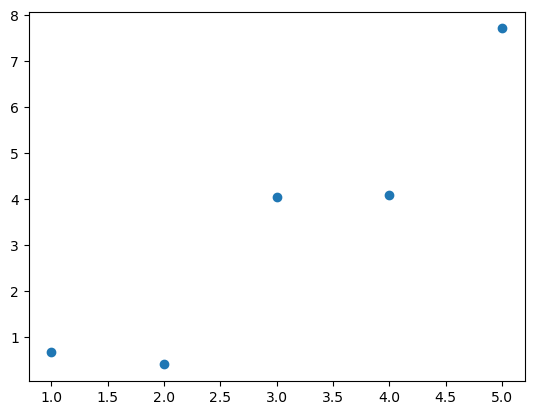

In [47]:
# plot scores
plt.scatter(num_layers, scores)

The lowest loss score is when there is 1 layer (0.6931).

In [58]:
# 3 neurons
num_neurons = 3
num_layers = [1,2,3,4,5]
scores = []

model = Sequential()
num_layer = 1

for num_layer in num_layers:
    
    # build model and evaluate
    # hidden layer 1
    model.add(Dense(2, input_dim = 2, activation = 'tanh'))
    if num_layer == 5:
        # hidden layer 2 - 5
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))    
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))   
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
    elif num_layer == 4:
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
    elif num_layer == 3:
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
    elif num_layer == 2:
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))

    # train model
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd')

    model.fit(X, y, batch_size=2, epochs=400)
    
    score = model.evaluate(X, y)
    scores.append(score)
    
    num_layer += 1


Epoch 1/400
80/80 [==============================] - 0s 990us/step - loss: 3.9561
Epoch 2/400
80/80 [==============================] - 0s 771us/step - loss: 3.2274
Epoch 3/400
80/80 [==============================] - 0s 795us/step - loss: 2.4273
Epoch 4/400
80/80 [==============================] - 0s 827us/step - loss: 2.4042
Epoch 5/400
80/80 [==============================] - 0s 844us/step - loss: 2.3875
Epoch 6/400
80/80 [==============================] - 0s 845us/step - loss: 2.3782
Epoch 7/400
80/80 [==============================] - 0s 805us/step - loss: 2.3718
Epoch 8/400
80/80 [==============================] - 0s 862us/step - loss: 2.3662
Epoch 9/400
80/80 [==============================] - 0s 826us/step - loss: 2.3664
Epoch 10/400
80/80 [==============================] - 0s 850us/step - loss: 2.3658
Epoch 11/400
80/80 [==============================] - 0s 856us/step - loss: 2.3614
Epoch 12/400
80/80 [==============================] - 0s 891us/step - loss: 2.3583
Epoch 13/400


80/80 [==============================] - 0s 876us/step - loss: 0.6973
Epoch 100/400
80/80 [==============================] - 0s 740us/step - loss: 0.6971
Epoch 101/400
80/80 [==============================] - 0s 825us/step - loss: 0.6979
Epoch 102/400
80/80 [==============================] - 0s 865us/step - loss: 0.6968
Epoch 103/400
80/80 [==============================] - 0s 825us/step - loss: 0.6977
Epoch 104/400
80/80 [==============================] - 0s 855us/step - loss: 0.6982
Epoch 105/400
80/80 [==============================] - 0s 850us/step - loss: 0.6972
Epoch 106/400
80/80 [==============================] - 0s 842us/step - loss: 0.6974
Epoch 107/400
80/80 [==============================] - 0s 838us/step - loss: 0.6960
Epoch 108/400
80/80 [==============================] - 0s 920us/step - loss: 0.6969
Epoch 109/400
80/80 [==============================] - 0s 741us/step - loss: 0.6966
Epoch 110/400
80/80 [==============================] - 0s 845us/step - loss: 0.6972
Epoch 

80/80 [==============================] - 0s 847us/step - loss: 0.6968
Epoch 197/400
80/80 [==============================] - 0s 804us/step - loss: 0.6974
Epoch 198/400
80/80 [==============================] - 0s 840us/step - loss: 0.6975
Epoch 199/400
80/80 [==============================] - 0s 849us/step - loss: 0.6972
Epoch 200/400
80/80 [==============================] - 0s 840us/step - loss: 0.6981
Epoch 201/400
80/80 [==============================] - 0s 820us/step - loss: 0.6976
Epoch 202/400
80/80 [==============================] - 0s 802us/step - loss: 0.6976
Epoch 203/400
80/80 [==============================] - 0s 800us/step - loss: 0.6975
Epoch 204/400
80/80 [==============================] - 0s 788us/step - loss: 0.6971
Epoch 205/400
80/80 [==============================] - 0s 788us/step - loss: 0.6966
Epoch 206/400
80/80 [==============================] - 0s 813us/step - loss: 0.6982
Epoch 207/400
80/80 [==============================] - 0s 694us/step - loss: 0.6975
Epoch 

80/80 [==============================] - 0s 803us/step - loss: 0.6975
Epoch 294/400
80/80 [==============================] - 0s 808us/step - loss: 0.6974
Epoch 295/400
80/80 [==============================] - 0s 794us/step - loss: 0.6977
Epoch 296/400
80/80 [==============================] - 0s 805us/step - loss: 0.6977
Epoch 297/400
80/80 [==============================] - 0s 810us/step - loss: 0.6974
Epoch 298/400
80/80 [==============================] - 0s 803us/step - loss: 0.6973
Epoch 299/400
80/80 [==============================] - 0s 806us/step - loss: 0.6979
Epoch 300/400
80/80 [==============================] - 0s 698us/step - loss: 0.6967
Epoch 301/400
80/80 [==============================] - 0s 692us/step - loss: 0.6972
Epoch 302/400
80/80 [==============================] - 0s 700us/step - loss: 0.6978
Epoch 303/400
80/80 [==============================] - 0s 879us/step - loss: 0.6964
Epoch 304/400
80/80 [==============================] - 0s 801us/step - loss: 0.6981
Epoch 

80/80 [==============================] - 0s 819us/step - loss: 0.6980
Epoch 391/400
80/80 [==============================] - 0s 824us/step - loss: 0.6977
Epoch 392/400
80/80 [==============================] - 0s 820us/step - loss: 0.6972
Epoch 393/400
80/80 [==============================] - 0s 798us/step - loss: 0.6975
Epoch 394/400
80/80 [==============================] - 0s 804us/step - loss: 0.6965
Epoch 395/400
80/80 [==============================] - 0s 748us/step - loss: 0.6975
Epoch 396/400
80/80 [==============================] - 0s 705us/step - loss: 0.6975
Epoch 397/400
80/80 [==============================] - 0s 873us/step - loss: 0.6969
Epoch 398/400
80/80 [==============================] - 0s 778us/step - loss: 0.6971
Epoch 399/400
80/80 [==============================] - 0s 845us/step - loss: 0.6977
Epoch 400/400
5/5 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 1/400
80/80 [==============================] - 0s 928us/step - loss: 7.7125
Epoch 2/400


80/80 [==============================] - 0s 861us/step - loss: 7.7125
Epoch 89/400
80/80 [==============================] - 0s 1ms/step - loss: 7.7125
Epoch 90/400
80/80 [==============================] - 0s 831us/step - loss: 7.7125
Epoch 91/400
80/80 [==============================] - 0s 860us/step - loss: 7.7125
Epoch 92/400
80/80 [==============================] - 0s 871us/step - loss: 7.7125
Epoch 93/400
80/80 [==============================] - 0s 835us/step - loss: 7.7125
Epoch 94/400
80/80 [==============================] - 0s 1ms/step - loss: 7.7125
Epoch 95/400
80/80 [==============================] - 0s 817us/step - loss: 7.7125
Epoch 96/400
80/80 [==============================] - 0s 1ms/step - loss: 7.7125
Epoch 97/400
80/80 [==============================] - 0s 825us/step - loss: 7.7125
Epoch 98/400
80/80 [==============================] - 0s 863us/step - loss: 7.7125
Epoch 99/400
80/80 [==============================] - 0s 870us/step - loss: 7.7125
Epoch 100/400
80/80 [==

80/80 [==============================] - 0s 823us/step - loss: 7.7125
Epoch 187/400
80/80 [==============================] - 0s 888us/step - loss: 7.7125
Epoch 188/400
80/80 [==============================] - 0s 976us/step - loss: 7.7125
Epoch 189/400
80/80 [==============================] - 0s 902us/step - loss: 7.7125
Epoch 190/400
80/80 [==============================] - 0s 782us/step - loss: 7.7125
Epoch 191/400
80/80 [==============================] - 0s 853us/step - loss: 7.7125
Epoch 192/400
80/80 [==============================] - 0s 837us/step - loss: 7.7125
Epoch 193/400
80/80 [==============================] - 0s 830us/step - loss: 7.7125
Epoch 194/400
80/80 [==============================] - 0s 844us/step - loss: 7.7125
Epoch 195/400
80/80 [==============================] - 0s 790us/step - loss: 7.7125
Epoch 196/400
80/80 [==============================] - 0s 847us/step - loss: 7.7125
Epoch 197/400
80/80 [==============================] - 0s 896us/step - loss: 7.7125
Epoch 

80/80 [==============================] - 0s 855us/step - loss: 7.7125
Epoch 284/400
80/80 [==============================] - 0s 790us/step - loss: 7.7125
Epoch 285/400
80/80 [==============================] - 0s 868us/step - loss: 7.7125
Epoch 286/400
80/80 [==============================] - 0s 846us/step - loss: 7.7125
Epoch 287/400
80/80 [==============================] - 0s 793us/step - loss: 7.7125
Epoch 288/400
80/80 [==============================] - 0s 878us/step - loss: 7.7125
Epoch 289/400
80/80 [==============================] - 0s 868us/step - loss: 7.7125
Epoch 290/400
80/80 [==============================] - 0s 802us/step - loss: 7.7125
Epoch 291/400
80/80 [==============================] - 0s 964us/step - loss: 7.7125
Epoch 292/400
80/80 [==============================] - 0s 861us/step - loss: 7.7125
Epoch 293/400
80/80 [==============================] - 0s 838us/step - loss: 7.7125
Epoch 294/400
80/80 [==============================] - 0s 830us/step - loss: 7.7125
Epoch 

80/80 [==============================] - 0s 939us/step - loss: 7.7125
Epoch 381/400
80/80 [==============================] - 0s 851us/step - loss: 7.7125
Epoch 382/400
80/80 [==============================] - 0s 844us/step - loss: 7.7125
Epoch 383/400
80/80 [==============================] - 0s 838us/step - loss: 7.7125
Epoch 384/400
80/80 [==============================] - 0s 844us/step - loss: 7.7125
Epoch 385/400
80/80 [==============================] - 0s 838us/step - loss: 7.7125
Epoch 386/400
80/80 [==============================] - 0s 851us/step - loss: 7.7125
Epoch 387/400
80/80 [==============================] - 0s 856us/step - loss: 7.7125
Epoch 388/400
80/80 [==============================] - 0s 807us/step - loss: 7.7125
Epoch 389/400
80/80 [==============================] - 0s 853us/step - loss: 7.7125
Epoch 390/400
80/80 [==============================] - 0s 839us/step - loss: 7.7125
Epoch 391/400
80/80 [==============================] - 0s 846us/step - loss: 7.7125
Epoch 

80/80 [==============================] - 0s 957us/step - loss: 5.3738
Epoch 79/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3740
Epoch 80/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3745
Epoch 81/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3738
Epoch 82/400
80/80 [==============================] - 0s 934us/step - loss: 5.3738
Epoch 83/400
80/80 [==============================] - 0s 917us/step - loss: 5.3744
Epoch 84/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3739
Epoch 85/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3745
Epoch 86/400
80/80 [==============================] - 0s 988us/step - loss: 5.3741
Epoch 87/400
80/80 [==============================] - 0s 930us/step - loss: 5.3739
Epoch 88/400
80/80 [==============================] - 0s 949us/step - loss: 5.3735
Epoch 89/400
80/80 [==============================] - 0s 933us/step - loss: 5.3742
Epoch 90/400
80/80 [=======

80/80 [==============================] - 0s 1ms/step - loss: 5.3737
Epoch 177/400
80/80 [==============================] - 0s 946us/step - loss: 5.3739
Epoch 178/400
80/80 [==============================] - 0s 925us/step - loss: 5.3739
Epoch 179/400
80/80 [==============================] - 0s 929us/step - loss: 5.3738
Epoch 180/400
80/80 [==============================] - 0s 971us/step - loss: 5.3739
Epoch 181/400
80/80 [==============================] - 0s 818us/step - loss: 5.3740
Epoch 182/400
80/80 [==============================] - 0s 920us/step - loss: 5.3740
Epoch 183/400
80/80 [==============================] - 0s 937us/step - loss: 5.3738
Epoch 184/400
80/80 [==============================] - 0s 931us/step - loss: 5.3739
Epoch 185/400
80/80 [==============================] - 0s 908us/step - loss: 5.3740
Epoch 186/400
80/80 [==============================] - 0s 931us/step - loss: 5.3738
Epoch 187/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3734
Epoch 188/

80/80 [==============================] - 0s 1ms/step - loss: 5.2936
Epoch 275/400
80/80 [==============================] - 0s 786us/step - loss: 5.2891
Epoch 276/400
80/80 [==============================] - 0s 863us/step - loss: 5.2896
Epoch 277/400
80/80 [==============================] - 0s 949us/step - loss: 5.2869
Epoch 278/400
80/80 [==============================] - 0s 925us/step - loss: 5.2849
Epoch 279/400
80/80 [==============================] - 0s 1ms/step - loss: 5.2815
Epoch 280/400
80/80 [==============================] - 0s 936us/step - loss: 5.2819
Epoch 281/400
80/80 [==============================] - 0s 928us/step - loss: 5.2806
Epoch 282/400
80/80 [==============================] - 0s 792us/step - loss: 5.2802
Epoch 283/400
80/80 [==============================] - 0s 1ms/step - loss: 5.2794
Epoch 284/400
80/80 [==============================] - 0s 764us/step - loss: 5.2797
Epoch 285/400
80/80 [==============================] - 0s 884us/step - loss: 5.2734
Epoch 286/40

80/80 [==============================] - 0s 914us/step - loss: 5.5563
Epoch 373/400
80/80 [==============================] - 0s 996us/step - loss: 5.3866
Epoch 374/400
80/80 [==============================] - 0s 929us/step - loss: 5.3753
Epoch 375/400
80/80 [==============================] - 0s 983us/step - loss: 5.3736
Epoch 376/400
80/80 [==============================] - 0s 764us/step - loss: 5.3737
Epoch 377/400
80/80 [==============================] - 0s 871us/step - loss: 5.3742
Epoch 378/400
80/80 [==============================] - 0s 888us/step - loss: 5.3739
Epoch 379/400
80/80 [==============================] - 0s 900us/step - loss: 5.3737
Epoch 380/400
80/80 [==============================] - 0s 1ms/step - loss: 4.5073
Epoch 381/400
80/80 [==============================] - 0s 942us/step - loss: 3.1321
Epoch 382/400
80/80 [==============================] - 0s 825us/step - loss: 3.0488
Epoch 383/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0365
Epoch 384/

80/80 [==============================] - 0s 1ms/step - loss: 3.0359
Epoch 72/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0322
Epoch 73/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0313
Epoch 74/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0355
Epoch 75/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0352
Epoch 76/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0354
Epoch 77/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0341
Epoch 78/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0314
Epoch 79/400
80/80 [==============================] - 0s 876us/step - loss: 3.0349
Epoch 80/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0315
Epoch 81/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0260
Epoch 82/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0340
Epoch 83/400
80/80 [===================

80/80 [==============================] - 0s 1ms/step - loss: 0.5992
Epoch 171/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6236
Epoch 172/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6106
Epoch 173/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6235
Epoch 174/400
80/80 [==============================] - 0s 886us/step - loss: 0.6582
Epoch 175/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6067
Epoch 176/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6059
Epoch 177/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6316
Epoch 178/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6119
Epoch 179/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6226
Epoch 180/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6326
Epoch 181/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6275
Epoch 182/400
80/80 [=======

80/80 [==============================] - 0s 1ms/step - loss: 0.5997
Epoch 270/400
80/80 [==============================] - 0s 865us/step - loss: 0.5946
Epoch 271/400
80/80 [==============================] - 0s 870us/step - loss: 0.6127
Epoch 272/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6058
Epoch 273/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6273
Epoch 274/400
80/80 [==============================] - 0s 1ms/step - loss: 0.5951
Epoch 275/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6214
Epoch 276/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6258
Epoch 277/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6238
Epoch 278/400
80/80 [==============================] - 0s 1ms/step - loss: 0.5995
Epoch 279/400
80/80 [==============================] - 0s 1ms/step - loss: 0.5999
Epoch 280/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6071
Epoch 281/400
80/80 [=====

80/80 [==============================] - 0s 999us/step - loss: 0.6020
Epoch 369/400
80/80 [==============================] - 0s 854us/step - loss: 0.6278
Epoch 370/400
80/80 [==============================] - 0s 896us/step - loss: 0.6052
Epoch 371/400
80/80 [==============================] - 0s 1ms/step - loss: 0.5977
Epoch 372/400
80/80 [==============================] - 0s 955us/step - loss: 0.5873
Epoch 373/400
80/80 [==============================] - 0s 968us/step - loss: 0.5847
Epoch 374/400
80/80 [==============================] - 0s 878us/step - loss: 0.6221
Epoch 375/400
80/80 [==============================] - 0s 1ms/step - loss: 0.5975
Epoch 376/400
80/80 [==============================] - 0s 985us/step - loss: 0.6037
Epoch 377/400
80/80 [==============================] - 0s 871us/step - loss: 0.5896
Epoch 378/400
80/80 [==============================] - 0s 1ms/step - loss: 0.5855
Epoch 379/400
80/80 [==============================] - 0s 1ms/step - loss: 0.5882
Epoch 380/400


80/80 [==============================] - 0s 1ms/step - loss: 5.3452
Epoch 68/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3456
Epoch 69/400
80/80 [==============================] - 0s 2ms/step - loss: 5.3459
Epoch 70/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3433
Epoch 71/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3466
Epoch 72/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3456
Epoch 73/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3449
Epoch 74/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3456
Epoch 75/400
80/80 [==============================] - 0s 992us/step - loss: 5.3464
Epoch 76/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3433
Epoch 77/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3462
Epoch 78/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3439
Epoch 79/400
80/80 [===================

80/80 [==============================] - 0s 1ms/step - loss: 5.3455
Epoch 168/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3457
Epoch 169/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3452
Epoch 170/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3455
Epoch 171/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3454
Epoch 172/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3454
Epoch 173/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3461
Epoch 174/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3448
Epoch 175/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3460
Epoch 176/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3461
Epoch 177/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3457
Epoch 178/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3455
Epoch 179/400
80/80 [=========

Epoch 267/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3451
Epoch 268/400
80/80 [==============================] - 0s 964us/step - loss: 5.3456
Epoch 269/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3459
Epoch 270/400
80/80 [==============================] - 0s 911us/step - loss: 5.3457
Epoch 271/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3456
Epoch 272/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3448
Epoch 273/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3458
Epoch 274/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3451
Epoch 275/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3447
Epoch 276/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3447
Epoch 277/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3460
Epoch 278/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3455
Epoch 279/40

80/80 [==============================] - 0s 1ms/step - loss: 5.3452
Epoch 367/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3460
Epoch 368/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3444
Epoch 369/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3453
Epoch 370/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3445
Epoch 371/400
80/80 [==============================] - 0s 953us/step - loss: 5.3454
Epoch 372/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3455
Epoch 373/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3452
Epoch 374/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3446
Epoch 375/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3453
Epoch 376/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3451
Epoch 377/400
80/80 [==============================] - 0s 1ms/step - loss: 5.3461
Epoch 378/400
80/80 [=======

In [59]:
scores

[0.6932092308998108,
 7.7124738693237305,
 3.0287070274353027,
 0.5928787589073181,
 5.343646049499512]

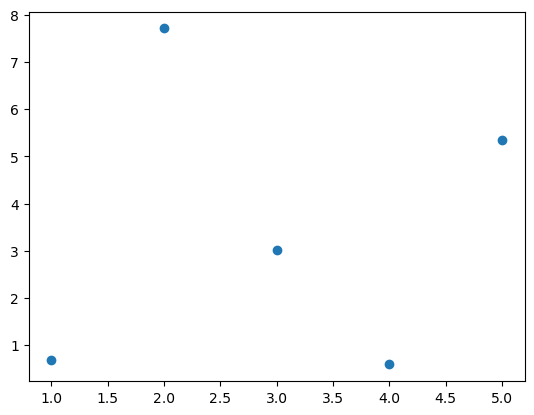

In [60]:
# plot scores
plt.scatter(num_layers, scores)

The lowest loss score is when there are 4 layers, more than required with 2 neurons, and the score itself is lower than the 2 neuron approach (0.5929 vs 0.6931).

In [61]:
# 4 neurons
num_neurons = 4
num_layers = [1,2,3,4,5]
scores = []

model = Sequential()
num_layer = 1

for num_layer in num_layers:
    
    # build model and evaluate
    # hidden layer 1
    model.add(Dense(2, input_dim = 2, activation = 'tanh'))
    if num_layer == 5:
        # hidden layer 2 - 5
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))    
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))   
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
    elif num_layer == 4:
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
    elif num_layer == 3:
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
    elif num_layer == 2:
        model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))

    # train model
    sgd = SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd')

    model.fit(X, y, batch_size=2, epochs=400)
    
    score = model.evaluate(X, y)
    scores.append(score)
    
    num_layer += 1


Epoch 1/400
80/80 [==============================] - 0s 1ms/step - loss: 2.3878
Epoch 2/400
80/80 [==============================] - 0s 739us/step - loss: 0.8214
Epoch 3/400
80/80 [==============================] - 0s 763us/step - loss: 0.7845
Epoch 4/400
80/80 [==============================] - 0s 703us/step - loss: 0.7586
Epoch 5/400
80/80 [==============================] - 0s 827us/step - loss: 0.7397
Epoch 6/400
80/80 [==============================] - 0s 843us/step - loss: 0.7274
Epoch 7/400
80/80 [==============================] - 0s 899us/step - loss: 0.7189
Epoch 8/400
80/80 [==============================] - 0s 809us/step - loss: 0.7137
Epoch 9/400
80/80 [==============================] - 0s 795us/step - loss: 0.7099
Epoch 10/400
80/80 [==============================] - 0s 792us/step - loss: 0.7062
Epoch 11/400
80/80 [==============================] - 0s 760us/step - loss: 0.7041
Epoch 12/400
80/80 [==============================] - 0s 859us/step - loss: 0.7023
Epoch 13/400
80

80/80 [==============================] - 0s 750us/step - loss: 0.6983
Epoch 100/400
80/80 [==============================] - 0s 793us/step - loss: 0.6966
Epoch 101/400
80/80 [==============================] - 0s 759us/step - loss: 0.6976
Epoch 102/400
80/80 [==============================] - 0s 778us/step - loss: 0.6982
Epoch 103/400
80/80 [==============================] - 0s 852us/step - loss: 0.6976
Epoch 104/400
80/80 [==============================] - 0s 871us/step - loss: 0.6979
Epoch 105/400
80/80 [==============================] - 0s 879us/step - loss: 0.6975
Epoch 106/400
80/80 [==============================] - 0s 900us/step - loss: 0.6976
Epoch 107/400
80/80 [==============================] - 0s 769us/step - loss: 0.6965
Epoch 108/400
80/80 [==============================] - 0s 846us/step - loss: 0.6968
Epoch 109/400
80/80 [==============================] - 0s 841us/step - loss: 0.6976
Epoch 110/400
80/80 [==============================] - 0s 767us/step - loss: 0.6973
Epoch 

80/80 [==============================] - 0s 819us/step - loss: 0.6973
Epoch 197/400
80/80 [==============================] - 0s 800us/step - loss: 0.6972
Epoch 198/400
80/80 [==============================] - 0s 861us/step - loss: 0.6980
Epoch 199/400
80/80 [==============================] - 0s 814us/step - loss: 0.6974
Epoch 200/400
80/80 [==============================] - 0s 795us/step - loss: 0.6977
Epoch 201/400
80/80 [==============================] - 0s 794us/step - loss: 0.6982
Epoch 202/400
80/80 [==============================] - 0s 757us/step - loss: 0.6979
Epoch 203/400
80/80 [==============================] - 0s 732us/step - loss: 0.6966
Epoch 204/400
80/80 [==============================] - 0s 843us/step - loss: 0.6971
Epoch 205/400
80/80 [==============================] - 0s 846us/step - loss: 0.6982
Epoch 206/400
80/80 [==============================] - 0s 843us/step - loss: 0.6982
Epoch 207/400
80/80 [==============================] - 0s 812us/step - loss: 0.6974
Epoch 

80/80 [==============================] - 0s 772us/step - loss: 0.6974
Epoch 294/400
80/80 [==============================] - 0s 793us/step - loss: 0.6975
Epoch 295/400
80/80 [==============================] - 0s 687us/step - loss: 0.6980
Epoch 296/400
80/80 [==============================] - 0s 840us/step - loss: 0.6978
Epoch 297/400
80/80 [==============================] - 0s 855us/step - loss: 0.6970
Epoch 298/400
80/80 [==============================] - 0s 839us/step - loss: 0.6980
Epoch 299/400
80/80 [==============================] - 0s 839us/step - loss: 0.6975
Epoch 300/400
80/80 [==============================] - 0s 854us/step - loss: 0.6974
Epoch 301/400
80/80 [==============================] - 0s 813us/step - loss: 0.6983
Epoch 302/400
80/80 [==============================] - 0s 791us/step - loss: 0.6971
Epoch 303/400
80/80 [==============================] - 0s 803us/step - loss: 0.6973
Epoch 304/400
80/80 [==============================] - 0s 802us/step - loss: 0.6979
Epoch 

80/80 [==============================] - 0s 831us/step - loss: 0.6973
Epoch 391/400
80/80 [==============================] - 0s 798us/step - loss: 0.6981
Epoch 392/400
80/80 [==============================] - 0s 813us/step - loss: 0.6973
Epoch 393/400
80/80 [==============================] - 0s 794us/step - loss: 0.6978
Epoch 394/400
80/80 [==============================] - 0s 803us/step - loss: 0.6975
Epoch 395/400
80/80 [==============================] - 0s 794us/step - loss: 0.6979
Epoch 396/400
80/80 [==============================] - 0s 755us/step - loss: 0.6966
Epoch 397/400
80/80 [==============================] - 0s 768us/step - loss: 0.6981
Epoch 398/400
80/80 [==============================] - 0s 844us/step - loss: 0.6974
Epoch 399/400
80/80 [==============================] - 0s 845us/step - loss: 0.6966
Epoch 400/400
5/5 [==============================] - 0s 3ms/step - loss: 0.6932
Epoch 1/400
80/80 [==============================] - 0s 1ms/step - loss: 4.2070
Epoch 2/400
80

80/80 [==============================] - 0s 755us/step - loss: 4.1667
Epoch 89/400
80/80 [==============================] - 0s 846us/step - loss: 4.1666
Epoch 90/400
80/80 [==============================] - 0s 850us/step - loss: 4.1654
Epoch 91/400
80/80 [==============================] - 0s 840us/step - loss: 4.1649
Epoch 92/400
80/80 [==============================] - 0s 848us/step - loss: 4.1647
Epoch 93/400
80/80 [==============================] - 0s 843us/step - loss: 4.1642
Epoch 94/400
80/80 [==============================] - 0s 843us/step - loss: 4.1637
Epoch 95/400
80/80 [==============================] - 0s 843us/step - loss: 4.1631
Epoch 96/400
80/80 [==============================] - 0s 1ms/step - loss: 4.1625
Epoch 97/400
80/80 [==============================] - 0s 864us/step - loss: 4.1622
Epoch 98/400
80/80 [==============================] - 0s 843us/step - loss: 4.1617
Epoch 99/400
80/80 [==============================] - 0s 839us/step - loss: 4.1611
Epoch 100/400
80/80

Epoch 186/400
80/80 [==============================] - 0s 816us/step - loss: 4.0569
Epoch 187/400
80/80 [==============================] - 0s 845us/step - loss: 4.0569
Epoch 188/400
80/80 [==============================] - 0s 848us/step - loss: 4.0550
Epoch 189/400
80/80 [==============================] - 0s 845us/step - loss: 4.0550
Epoch 190/400
80/80 [==============================] - 0s 845us/step - loss: 4.0536
Epoch 191/400
80/80 [==============================] - 0s 843us/step - loss: 4.0540
Epoch 192/400
80/80 [==============================] - 0s 844us/step - loss: 4.0522
Epoch 193/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0530
Epoch 194/400
80/80 [==============================] - 0s 812us/step - loss: 4.0527
Epoch 195/400
80/80 [==============================] - 0s 845us/step - loss: 4.0513
Epoch 196/400
80/80 [==============================] - 0s 844us/step - loss: 4.0515
Epoch 197/400
80/80 [==============================] - 0s 845us/step - loss: 4

80/80 [==============================] - 0s 871us/step - loss: 4.0471
Epoch 284/400
80/80 [==============================] - 0s 793us/step - loss: 4.0464
Epoch 285/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0482
Epoch 286/400
80/80 [==============================] - 0s 798us/step - loss: 4.0468
Epoch 287/400
80/80 [==============================] - 0s 848us/step - loss: 4.0447
Epoch 288/400
80/80 [==============================] - 0s 840us/step - loss: 4.0496
Epoch 289/400
80/80 [==============================] - 0s 848us/step - loss: 4.0473
Epoch 290/400
80/80 [==============================] - 0s 840us/step - loss: 4.0466
Epoch 291/400
80/80 [==============================] - 0s 858us/step - loss: 4.0472
Epoch 292/400
80/80 [==============================] - 0s 838us/step - loss: 4.0473
Epoch 293/400
80/80 [==============================] - 0s 902us/step - loss: 4.0476
Epoch 294/400
80/80 [==============================] - 0s 792us/step - loss: 4.0475
Epoch 29

80/80 [==============================] - 0s 855us/step - loss: 4.0464
Epoch 381/400
80/80 [==============================] - 0s 810us/step - loss: 4.0479
Epoch 382/400
80/80 [==============================] - 0s 842us/step - loss: 4.0467
Epoch 383/400
80/80 [==============================] - 0s 844us/step - loss: 4.0473
Epoch 384/400
80/80 [==============================] - 0s 844us/step - loss: 4.0463
Epoch 385/400
80/80 [==============================] - 0s 847us/step - loss: 4.0467
Epoch 386/400
80/80 [==============================] - 0s 842us/step - loss: 4.0471
Epoch 387/400
80/80 [==============================] - 0s 844us/step - loss: 4.0479
Epoch 388/400
80/80 [==============================] - 0s 845us/step - loss: 4.0485
Epoch 389/400
80/80 [==============================] - 0s 843us/step - loss: 4.0481
Epoch 390/400
80/80 [==============================] - 0s 841us/step - loss: 4.0478
Epoch 391/400
80/80 [==============================] - 0s 847us/step - loss: 4.0482
Epoch 

80/80 [==============================] - 0s 1ms/step - loss: 4.0567
Epoch 79/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0556
Epoch 80/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0552
Epoch 81/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0577
Epoch 82/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0583
Epoch 83/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0544
Epoch 84/400
80/80 [==============================] - 0s 969us/step - loss: 4.0582
Epoch 85/400
80/80 [==============================] - 0s 831us/step - loss: 4.0518
Epoch 86/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0963
Epoch 87/400
80/80 [==============================] - 0s 878us/step - loss: 4.0547
Epoch 88/400
80/80 [==============================] - 0s 863us/step - loss: 4.0534
Epoch 89/400
80/80 [==============================] - 0s 840us/step - loss: 4.0551
Epoch 90/400
80/80 [===========

80/80 [==============================] - 0s 847us/step - loss: 4.1530
Epoch 177/400
80/80 [==============================] - 0s 864us/step - loss: 4.1489
Epoch 178/400
80/80 [==============================] - 0s 1ms/step - loss: 4.1448
Epoch 179/400
80/80 [==============================] - 0s 967us/step - loss: 4.1399
Epoch 180/400
80/80 [==============================] - 0s 1ms/step - loss: 4.1341
Epoch 181/400
80/80 [==============================] - 0s 1ms/step - loss: 4.1294
Epoch 182/400
80/80 [==============================] - 0s 1ms/step - loss: 4.1212
Epoch 183/400
80/80 [==============================] - 0s 1ms/step - loss: 4.1082
Epoch 184/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0937
Epoch 185/400
80/80 [==============================] - 0s 981us/step - loss: 4.0804
Epoch 186/400
80/80 [==============================] - 0s 926us/step - loss: 4.0690
Epoch 187/400
80/80 [==============================] - 0s 907us/step - loss: 4.0829
Epoch 188/400
80/8

80/80 [==============================] - 0s 891us/step - loss: 4.0541
Epoch 275/400
80/80 [==============================] - 0s 818us/step - loss: 4.0962
Epoch 276/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0591
Epoch 277/400
80/80 [==============================] - 0s 950us/step - loss: 4.0551
Epoch 278/400
80/80 [==============================] - 0s 754us/step - loss: 4.0568
Epoch 279/400
80/80 [==============================] - 0s 849us/step - loss: 4.1516
Epoch 280/400
80/80 [==============================] - 0s 874us/step - loss: 4.1743
Epoch 281/400
80/80 [==============================] - 0s 841us/step - loss: 4.1043
Epoch 282/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0808
Epoch 283/400
80/80 [==============================] - 0s 914us/step - loss: 4.0645
Epoch 284/400
80/80 [==============================] - 0s 866us/step - loss: 4.0615
Epoch 285/400
80/80 [==============================] - 0s 947us/step - loss: 4.0743
Epoch 286/

Epoch 372/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0549
Epoch 373/400
80/80 [==============================] - 0s 773us/step - loss: 4.0941
Epoch 374/400
80/80 [==============================] - 0s 885us/step - loss: 4.0527
Epoch 375/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0513
Epoch 376/400
80/80 [==============================] - 0s 896us/step - loss: 4.0884
Epoch 377/400
80/80 [==============================] - 0s 871us/step - loss: 4.0556
Epoch 378/400
80/80 [==============================] - 0s 876us/step - loss: 4.0548
Epoch 379/400
80/80 [==============================] - 0s 821us/step - loss: 4.0546
Epoch 380/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0604
Epoch 381/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0501
Epoch 382/400
80/80 [==============================] - 0s 803us/step - loss: 4.0571
Epoch 383/400
80/80 [==============================] - 0s 1ms/step - loss: 4.0532
Ep

80/80 [==============================] - 0s 1ms/step - loss: 4.2034
Epoch 72/400
80/80 [==============================] - 0s 1000us/step - loss: 4.2037
Epoch 73/400
80/80 [==============================] - 0s 987us/step - loss: 4.2039
Epoch 74/400
80/80 [==============================] - 0s 1ms/step - loss: 4.2041
Epoch 75/400
80/80 [==============================] - 0s 992us/step - loss: 4.2022
Epoch 76/400
80/80 [==============================] - 0s 1ms/step - loss: 4.2046
Epoch 77/400
80/80 [==============================] - 0s 979us/step - loss: 4.2044
Epoch 78/400
80/80 [==============================] - 0s 1ms/step - loss: 4.2044
Epoch 79/400
80/80 [==============================] - 0s 2ms/step - loss: 4.2038
Epoch 80/400
80/80 [==============================] - 0s 1ms/step - loss: 4.2041
Epoch 81/400
80/80 [==============================] - 0s 1ms/step - loss: 4.2039
Epoch 82/400
80/80 [==============================] - 0s 965us/step - loss: 4.2031
Epoch 83/400
80/80 [==========

80/80 [==============================] - 0s 1ms/step - loss: 2.4916
Epoch 171/400
80/80 [==============================] - 0s 964us/step - loss: 2.4536
Epoch 172/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4531
Epoch 173/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4506
Epoch 174/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4478
Epoch 175/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4538
Epoch 176/400
80/80 [==============================] - 0s 987us/step - loss: 2.4521
Epoch 177/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4528
Epoch 178/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4533
Epoch 179/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4525
Epoch 180/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4514
Epoch 181/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4517
Epoch 182/400
80/80 [=====

80/80 [==============================] - 0s 954us/step - loss: 2.4507
Epoch 270/400
80/80 [==============================] - 0s 956us/step - loss: 2.4534
Epoch 271/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4510
Epoch 272/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4526
Epoch 273/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4521
Epoch 274/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4506
Epoch 275/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4533
Epoch 276/400
80/80 [==============================] - 0s 991us/step - loss: 2.4510
Epoch 277/400
80/80 [==============================] - 0s 979us/step - loss: 2.4523
Epoch 278/400
80/80 [==============================] - 0s 973us/step - loss: 2.4516
Epoch 279/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4521
Epoch 280/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4519
Epoch 281/400
80/80 

Epoch 368/400
80/80 [==============================] - 0s 977us/step - loss: 2.4511
Epoch 369/400
80/80 [==============================] - 0s 994us/step - loss: 2.4524
Epoch 370/400
80/80 [==============================] - 0s 979us/step - loss: 2.4522
Epoch 371/400
80/80 [==============================] - 0s 956us/step - loss: 2.4517
Epoch 372/400
80/80 [==============================] - 0s 994us/step - loss: 2.4520
Epoch 373/400
80/80 [==============================] - 0s 974us/step - loss: 2.4524
Epoch 374/400
80/80 [==============================] - 0s 995us/step - loss: 2.4521
Epoch 375/400
80/80 [==============================] - 0s 981us/step - loss: 2.4520
Epoch 376/400
80/80 [==============================] - 0s 990us/step - loss: 2.4526
Epoch 377/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4513
Epoch 378/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4528
Epoch 379/400
80/80 [==============================] - 0s 974us/step - loss: 2.4

80/80 [==============================] - 0s 1ms/step - loss: 2.4502
Epoch 68/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4506
Epoch 69/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4506
Epoch 70/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4504
Epoch 71/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4501
Epoch 72/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4484
Epoch 73/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4517
Epoch 74/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4511
Epoch 75/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4504
Epoch 76/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4505
Epoch 77/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4511
Epoch 78/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4507
Epoch 79/400
80/80 [=====================

80/80 [==============================] - 0s 1ms/step - loss: 2.4518
Epoch 168/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4501
Epoch 169/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4508
Epoch 170/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4509
Epoch 171/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4506
Epoch 172/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4502
Epoch 173/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4510
Epoch 174/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4499
Epoch 175/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4502
Epoch 176/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4505
Epoch 177/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4507
Epoch 178/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4509
Epoch 179/400
80/80 [=========

80/80 [==============================] - 0s 2ms/step - loss: 2.4507
Epoch 268/400
80/80 [==============================] - 0s 2ms/step - loss: 2.4506
Epoch 269/400
80/80 [==============================] - 0s 2ms/step - loss: 2.4501
Epoch 270/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4494
Epoch 271/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4501
Epoch 272/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4496
Epoch 273/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4504
Epoch 274/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4509
Epoch 275/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4496
Epoch 276/400
80/80 [==============================] - 0s 2ms/step - loss: 2.4500
Epoch 277/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4505
Epoch 278/400
80/80 [==============================] - 0s 2ms/step - loss: 2.4503
Epoch 279/400
80/80 [=========

80/80 [==============================] - 0s 1ms/step - loss: 2.4505
Epoch 368/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4500
Epoch 369/400
80/80 [==============================] - 0s 2ms/step - loss: 2.4499
Epoch 370/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4498
Epoch 371/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4502
Epoch 372/400
80/80 [==============================] - 0s 2ms/step - loss: 2.4504
Epoch 373/400
80/80 [==============================] - 0s 2ms/step - loss: 2.4503
Epoch 374/400
80/80 [==============================] - 0s 2ms/step - loss: 2.4503
Epoch 375/400
80/80 [==============================] - 0s 2ms/step - loss: 2.4500
Epoch 376/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4502
Epoch 377/400
80/80 [==============================] - 0s 1ms/step - loss: 2.4501
Epoch 378/400
80/80 [==============================] - 0s 2ms/step - loss: 2.4503
Epoch 379/400
80/80 [=========

In [62]:
scores

[0.693151593208313,
 4.042737007141113,
 4.046496391296387,
 2.448061943054199,
 2.44816255569458]

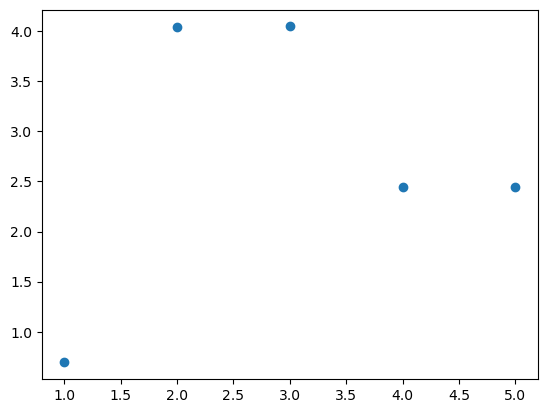

In [63]:
# plot scores
plt.scatter(num_layers, scores)

The lowest loss score is when there is 1 layer, the same as required with 2 neurons and less than with 3 neurons, and the score itself is higher than the 3 neuron approach but lower than the 2 neuron approach at 0.69315.

In [65]:
# 4 layers with 3 neurons is optimal 
# Using the most optimal configuraion (n-layers, k-neurons per layer), compare how tanh, sigmoid,softplus and relu effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)

num_neurons = 3

model = Sequential()

model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))    
model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))
model.add(Dense(num_neurons, input_dim = 2, activation = 'tanh'))   

# train model
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400)
    
score = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 0s 1ms/step - loss: 1.8507
Epoch 2/400
80/80 [==============================] - 0s 798us/step - loss: 0.9388
Epoch 3/400
80/80 [==============================] - 0s 846us/step - loss: 0.7105
Epoch 4/400
80/80 [==============================] - 0s 851us/step - loss: 0.6913
Epoch 5/400
80/80 [==============================] - 0s 844us/step - loss: 0.6739
Epoch 6/400
80/80 [==============================] - 0s 846us/step - loss: 0.6748
Epoch 7/400
80/80 [==============================] - 0s 1ms/step - loss: 0.7027
Epoch 8/400
80/80 [==============================] - 0s 786us/step - loss: 0.6953
Epoch 9/400
80/80 [==============================] - 0s 843us/step - loss: 0.6454
Epoch 10/400
80/80 [==============================] - 0s 855us/step - loss: 0.6366
Epoch 11/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6516
Epoch 12/400
80/80 [==============================] - 0s 837us/step - loss: 0.6373
Epoch 13/400
80/80 

80/80 [==============================] - 0s 909us/step - loss: 0.6131
Epoch 101/400
80/80 [==============================] - 0s 873us/step - loss: 0.6199
Epoch 102/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6222
Epoch 103/400
80/80 [==============================] - 0s 981us/step - loss: 0.6135
Epoch 104/400
80/80 [==============================] - 0s 888us/step - loss: 0.6130
Epoch 105/400
80/80 [==============================] - 0s 892us/step - loss: 0.6097
Epoch 106/400
80/80 [==============================] - 0s 893us/step - loss: 0.6082
Epoch 107/400
80/80 [==============================] - 0s 888us/step - loss: 0.6004
Epoch 108/400
80/80 [==============================] - 0s 898us/step - loss: 0.6091
Epoch 109/400
80/80 [==============================] - 0s 872us/step - loss: 0.6014
Epoch 110/400
80/80 [==============================] - 0s 971us/step - loss: 0.5981
Epoch 111/400
80/80 [==============================] - 0s 901us/step - loss: 0.6028
Epoch 11

80/80 [==============================] - 0s 1ms/step - loss: 0.6994
Epoch 199/400
80/80 [==============================] - 0s 986us/step - loss: 0.6996
Epoch 200/400
80/80 [==============================] - 0s 872us/step - loss: 0.6977
Epoch 201/400
80/80 [==============================] - 0s 947us/step - loss: 0.7009
Epoch 202/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6976
Epoch 203/400
80/80 [==============================] - 0s 973us/step - loss: 0.6973
Epoch 204/400
80/80 [==============================] - 0s 1ms/step - loss: 0.7003
Epoch 205/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6971
Epoch 206/400
80/80 [==============================] - 0s 861us/step - loss: 0.6983
Epoch 207/400
80/80 [==============================] - 0s 998us/step - loss: 0.6966
Epoch 208/400
80/80 [==============================] - 0s 866us/step - loss: 0.6979
Epoch 209/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6992
Epoch 210/400
80

80/80 [==============================] - 0s 944us/step - loss: 0.6988
Epoch 297/400
80/80 [==============================] - 0s 828us/step - loss: 0.6991
Epoch 298/400
80/80 [==============================] - 0s 916us/step - loss: 0.6989
Epoch 299/400
80/80 [==============================] - 0s 917us/step - loss: 0.6985
Epoch 300/400
80/80 [==============================] - 0s 845us/step - loss: 0.7016
Epoch 301/400
80/80 [==============================] - 0s 853us/step - loss: 0.7001
Epoch 302/400
80/80 [==============================] - 0s 706us/step - loss: 0.7009
Epoch 303/400
80/80 [==============================] - 0s 847us/step - loss: 0.6997
Epoch 304/400
80/80 [==============================] - 0s 810us/step - loss: 0.6966
Epoch 305/400
80/80 [==============================] - 0s 961us/step - loss: 0.7008
Epoch 306/400
80/80 [==============================] - 0s 983us/step - loss: 0.6989
Epoch 307/400
80/80 [==============================] - 0s 979us/step - loss: 0.6999
Epoch 

80/80 [==============================] - 0s 985us/step - loss: 0.7003
Epoch 395/400
80/80 [==============================] - 0s 913us/step - loss: 0.6985
Epoch 396/400
80/80 [==============================] - 0s 895us/step - loss: 0.7000
Epoch 397/400
80/80 [==============================] - 0s 982us/step - loss: 0.6992
Epoch 398/400
80/80 [==============================] - 0s 910us/step - loss: 0.6993
Epoch 399/400
80/80 [==============================] - 0s 901us/step - loss: 0.6997
Epoch 400/400
5/5 [==============================] - 0s 2ms/step - loss: 0.6932


IndexError: list assignment index out of range

In [68]:
# tanh
score

0.6931637525558472

In [70]:
# 4 layers with 3 neurons is optimal 
# Using the most optimal configuraion (n-layers, k-neurons per layer), compare how tanh, sigmoid,softplus and relu effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)

num_neurons = 3
scores = []

model = Sequential()

model.add(Dense(num_neurons, input_dim = 2, activation = 'sigmoid'))
model.add(Dense(num_neurons, input_dim = 2, activation = 'sigmoid'))    
model.add(Dense(num_neurons, input_dim = 2, activation = 'sigmoid'))
# With sigmoid + binary cross entropy the final dense layer should have 1 node
# https://stackoverflow.com/questions/48851558/tensorflow-estimator-valueerror-logits-and-labels-must-have-the-same-shape
model.add(Dense(1, input_dim = 2, activation = 'sigmoid'))   

# train model
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400)
    
score = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 0s 1ms/step - loss: 0.7854
Epoch 2/400
80/80 [==============================] - 0s 781us/step - loss: 0.7385
Epoch 3/400
80/80 [==============================] - 0s 843us/step - loss: 0.7161
Epoch 4/400
80/80 [==============================] - 0s 1ms/step - loss: 0.7051
Epoch 5/400
80/80 [==============================] - 0s 811us/step - loss: 0.6992
Epoch 6/400
80/80 [==============================] - 0s 849us/step - loss: 0.6965
Epoch 7/400
80/80 [==============================] - 0s 982us/step - loss: 0.6955
Epoch 8/400
80/80 [==============================] - 0s 868us/step - loss: 0.6947
Epoch 9/400
80/80 [==============================] - 0s 843us/step - loss: 0.6942
Epoch 10/400
80/80 [==============================] - 0s 844us/step - loss: 0.6944
Epoch 11/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6943
Epoch 12/400
80/80 [==============================] - 0s 801us/step - loss: 0.6943
Epoch 13/400
80/80 

80/80 [==============================] - 0s 832us/step - loss: 0.6941
Epoch 101/400
80/80 [==============================] - 0s 845us/step - loss: 0.6945
Epoch 102/400
80/80 [==============================] - 0s 843us/step - loss: 0.6943
Epoch 103/400
80/80 [==============================] - 0s 925us/step - loss: 0.6944
Epoch 104/400
80/80 [==============================] - 0s 748us/step - loss: 0.6942
Epoch 105/400
80/80 [==============================] - 0s 822us/step - loss: 0.6940
Epoch 106/400
80/80 [==============================] - 0s 863us/step - loss: 0.6942
Epoch 107/400
80/80 [==============================] - 0s 845us/step - loss: 0.6942
Epoch 108/400
80/80 [==============================] - 0s 847us/step - loss: 0.6941
Epoch 109/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6941
Epoch 110/400
80/80 [==============================] - 0s 819us/step - loss: 0.6942
Epoch 111/400
80/80 [==============================] - 0s 854us/step - loss: 0.6939
Epoch 11

80/80 [==============================] - 0s 878us/step - loss: 0.6941
Epoch 198/400
80/80 [==============================] - 0s 910us/step - loss: 0.6945
Epoch 199/400
80/80 [==============================] - 0s 869us/step - loss: 0.6941
Epoch 200/400
80/80 [==============================] - 0s 867us/step - loss: 0.6942
Epoch 201/400
80/80 [==============================] - 0s 817us/step - loss: 0.6941
Epoch 202/400
80/80 [==============================] - 0s 840us/step - loss: 0.6943
Epoch 203/400
80/80 [==============================] - 0s 878us/step - loss: 0.6942
Epoch 204/400
80/80 [==============================] - 0s 853us/step - loss: 0.6941
Epoch 205/400
80/80 [==============================] - 0s 857us/step - loss: 0.6943
Epoch 206/400
80/80 [==============================] - 0s 865us/step - loss: 0.6940
Epoch 207/400
80/80 [==============================] - 0s 873us/step - loss: 0.6944
Epoch 208/400
80/80 [==============================] - 0s 843us/step - loss: 0.6941
Epoch 

80/80 [==============================] - 0s 868us/step - loss: 0.6944
Epoch 295/400
80/80 [==============================] - 0s 809us/step - loss: 0.6943
Epoch 296/400
80/80 [==============================] - 0s 865us/step - loss: 0.6940
Epoch 297/400
80/80 [==============================] - 0s 850us/step - loss: 0.6943
Epoch 298/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6942
Epoch 299/400
80/80 [==============================] - 0s 838us/step - loss: 0.6942
Epoch 300/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6942
Epoch 301/400
80/80 [==============================] - 0s 856us/step - loss: 0.6944
Epoch 302/400
80/80 [==============================] - 0s 841us/step - loss: 0.6941
Epoch 303/400
80/80 [==============================] - 0s 873us/step - loss: 0.6944
Epoch 304/400
80/80 [==============================] - 0s 950us/step - loss: 0.6941
Epoch 305/400
80/80 [==============================] - 0s 697us/step - loss: 0.6941
Epoch 306/

80/80 [==============================] - 0s 904us/step - loss: 0.6940
Epoch 392/400
80/80 [==============================] - 0s 885us/step - loss: 0.6942
Epoch 393/400
80/80 [==============================] - 0s 869us/step - loss: 0.6943
Epoch 394/400
80/80 [==============================] - 0s 925us/step - loss: 0.6943
Epoch 395/400
80/80 [==============================] - 0s 925us/step - loss: 0.6942
Epoch 396/400
80/80 [==============================] - 0s 867us/step - loss: 0.6941
Epoch 397/400
80/80 [==============================] - 0s 854us/step - loss: 0.6942
Epoch 398/400
80/80 [==============================] - 0s 830us/step - loss: 0.6939
Epoch 399/400
80/80 [==============================] - 0s 829us/step - loss: 0.6942
Epoch 400/400
5/5 [==============================] - 0s 1ms/step - loss: 0.6931


In [71]:
# sigmoid
score # slightly better than tanh

0.693145215511322

In [72]:
# 4 layers with 3 neurons is optimal 
# Using the most optimal configuraion (n-layers, k-neurons per layer), compare how tanh, sigmoid,softplus and relu effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)

num_neurons = 3
scores = []

model = Sequential()

model.add(Dense(num_neurons, input_dim = 2, activation = 'softplus'))
model.add(Dense(num_neurons, input_dim = 2, activation = 'softplus'))    
model.add(Dense(num_neurons, input_dim = 2, activation = 'softplus'))
model.add(Dense(num_neurons, input_dim = 2, activation = 'softplus'))   

# train model
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400)
    
score = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6973
Epoch 2/400
80/80 [==============================] - 0s 900us/step - loss: 0.6955
Epoch 3/400
80/80 [==============================] - 0s 845us/step - loss: 0.6948
Epoch 4/400
80/80 [==============================] - 0s 846us/step - loss: 0.6949
Epoch 5/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6942
Epoch 6/400
80/80 [==============================] - 0s 838us/step - loss: 0.6940
Epoch 7/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6940
Epoch 8/400
80/80 [==============================] - 0s 868us/step - loss: 0.6942
Epoch 9/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6940
Epoch 10/400
80/80 [==============================] - 0s 827us/step - loss: 0.6941
Epoch 11/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6942
Epoch 12/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6940
Epoch 13/400
80/80 [=====

80/80 [==============================] - 0s 958us/step - loss: 0.6934
Epoch 101/400
80/80 [==============================] - 0s 876us/step - loss: 0.6932
Epoch 102/400
80/80 [==============================] - 0s 855us/step - loss: 0.6933
Epoch 103/400
80/80 [==============================] - 0s 867us/step - loss: 0.6933
Epoch 104/400
80/80 [==============================] - 0s 986us/step - loss: 0.6929
Epoch 105/400
80/80 [==============================] - 0s 887us/step - loss: 0.6932
Epoch 106/400
80/80 [==============================] - 0s 874us/step - loss: 0.6931
Epoch 107/400
80/80 [==============================] - 0s 939us/step - loss: 0.6931
Epoch 108/400
80/80 [==============================] - 0s 878us/step - loss: 0.6931
Epoch 109/400
80/80 [==============================] - 0s 890us/step - loss: 0.6932
Epoch 110/400
80/80 [==============================] - 0s 837us/step - loss: 0.6932
Epoch 111/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 11

80/80 [==============================] - 0s 1ms/step - loss: 0.6909
Epoch 199/400
80/80 [==============================] - 0s 856us/step - loss: 0.6906
Epoch 200/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6906
Epoch 201/400
80/80 [==============================] - 0s 923us/step - loss: 0.6904
Epoch 202/400
80/80 [==============================] - 0s 876us/step - loss: 0.6906
Epoch 203/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6905
Epoch 204/400
80/80 [==============================] - 0s 875us/step - loss: 0.6900
Epoch 205/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6902
Epoch 206/400
80/80 [==============================] - 0s 931us/step - loss: 0.6903
Epoch 207/400
80/80 [==============================] - 0s 897us/step - loss: 0.6901
Epoch 208/400
80/80 [==============================] - 0s 904us/step - loss: 0.6901
Epoch 209/400
80/80 [==============================] - 0s 899us/step - loss: 0.6900
Epoch 210/400


80/80 [==============================] - 0s 870us/step - loss: 0.6544
Epoch 297/400
80/80 [==============================] - 0s 928us/step - loss: 0.6522
Epoch 298/400
80/80 [==============================] - 0s 968us/step - loss: 0.6498
Epoch 299/400
80/80 [==============================] - 0s 842us/step - loss: 0.6475
Epoch 300/400
80/80 [==============================] - 0s 927us/step - loss: 0.6457
Epoch 301/400
80/80 [==============================] - 0s 856us/step - loss: 0.6428
Epoch 302/400
80/80 [==============================] - 0s 849us/step - loss: 0.6409
Epoch 303/400
80/80 [==============================] - 0s 861us/step - loss: 0.6377
Epoch 304/400
80/80 [==============================] - 0s 819us/step - loss: 0.6338
Epoch 305/400
80/80 [==============================] - 0s 849us/step - loss: 0.6318
Epoch 306/400
80/80 [==============================] - 0s 730us/step - loss: 0.6281
Epoch 307/400
80/80 [==============================] - 0s 983us/step - loss: 0.6245
Epoch 

80/80 [==============================] - 0s 1ms/step - loss: 0.1784
Epoch 394/400
80/80 [==============================] - 0s 835us/step - loss: 0.1824
Epoch 395/400
80/80 [==============================] - 0s 790us/step - loss: 0.1736
Epoch 396/400
80/80 [==============================] - 0s 844us/step - loss: 0.1753
Epoch 397/400
80/80 [==============================] - 0s 848us/step - loss: 0.1802
Epoch 398/400
80/80 [==============================] - 0s 840us/step - loss: 0.1734
Epoch 399/400
80/80 [==============================] - 0s 843us/step - loss: 0.1748
Epoch 400/400
5/5 [==============================] - 0s 1ms/step - loss: 0.1493


In [73]:
# softplus
score # lowest so far

0.14931347966194153

In [74]:
# 4 layers with 3 neurons is optimal 
# Using the most optimal configuraion (n-layers, k-neurons per layer), compare how tanh, sigmoid,softplus and relu effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)

num_neurons = 3
scores = []

model = Sequential()

model.add(Dense(num_neurons, input_dim = 2, activation = 'relu'))
model.add(Dense(num_neurons, input_dim = 2, activation = 'relu'))    
model.add(Dense(num_neurons, input_dim = 2, activation = 'relu'))
model.add(Dense(num_neurons, input_dim = 2, activation = 'relu'))   

# train model
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400)
    
score = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0234
Epoch 2/400
80/80 [==============================] - 0s 854us/step - loss: 2.9845
Epoch 3/400
80/80 [==============================] - 0s 876us/step - loss: 2.9611
Epoch 4/400
80/80 [==============================] - 0s 1ms/step - loss: 2.9368
Epoch 5/400
80/80 [==============================] - 0s 771us/step - loss: 2.9048
Epoch 6/400
80/80 [==============================] - 0s 1ms/step - loss: 2.8711
Epoch 7/400
80/80 [==============================] - 0s 847us/step - loss: 2.8447
Epoch 8/400
80/80 [==============================] - 0s 813us/step - loss: 2.8171
Epoch 9/400
80/80 [==============================] - 0s 938us/step - loss: 2.8083
Epoch 10/400
80/80 [==============================] - 0s 961us/step - loss: 2.8051
Epoch 11/400
80/80 [==============================] - 0s 829us/step - loss: 2.7873
Epoch 12/400
80/80 [==============================] - 0s 1ms/step - loss: 2.8961
Epoch 13/400
80/80 [=

80/80 [==============================] - 0s 806us/step - loss: 7.6539
Epoch 101/400
80/80 [==============================] - 0s 1ms/step - loss: 7.6539
Epoch 102/400
80/80 [==============================] - 0s 1ms/step - loss: 7.6539
Epoch 103/400
80/80 [==============================] - 0s 835us/step - loss: 7.6539
Epoch 104/400
80/80 [==============================] - 0s 1ms/step - loss: 7.6539
Epoch 105/400
80/80 [==============================] - 0s 834us/step - loss: 7.6539
Epoch 106/400
80/80 [==============================] - 0s 881us/step - loss: 7.6539
Epoch 107/400
80/80 [==============================] - 0s 844us/step - loss: 7.6539
Epoch 108/400
80/80 [==============================] - 0s 827us/step - loss: 7.6539
Epoch 109/400
80/80 [==============================] - 0s 1ms/step - loss: 7.6539
Epoch 110/400
80/80 [==============================] - 0s 938us/step - loss: 7.6539
Epoch 111/400
80/80 [==============================] - 0s 865us/step - loss: 7.6539
Epoch 112/400


80/80 [==============================] - 0s 883us/step - loss: 7.6539
Epoch 199/400
80/80 [==============================] - 0s 896us/step - loss: 7.6539
Epoch 200/400
80/80 [==============================] - 0s 937us/step - loss: 7.6539
Epoch 201/400
80/80 [==============================] - 0s 848us/step - loss: 7.6539
Epoch 202/400
80/80 [==============================] - 0s 1ms/step - loss: 7.6539
Epoch 203/400
80/80 [==============================] - 0s 765us/step - loss: 7.6539
Epoch 204/400
80/80 [==============================] - 0s 1ms/step - loss: 7.6539
Epoch 205/400
80/80 [==============================] - 0s 892us/step - loss: 7.6539
Epoch 206/400
80/80 [==============================] - 0s 893us/step - loss: 7.6539
Epoch 207/400
80/80 [==============================] - 0s 885us/step - loss: 7.6539
Epoch 208/400
80/80 [==============================] - 0s 871us/step - loss: 7.6539
Epoch 209/400
80/80 [==============================] - 0s 870us/step - loss: 7.6539
Epoch 210/

80/80 [==============================] - 0s 849us/step - loss: 7.6539
Epoch 297/400
80/80 [==============================] - 0s 904us/step - loss: 7.6539
Epoch 298/400
80/80 [==============================] - 0s 963us/step - loss: 7.6539
Epoch 299/400
80/80 [==============================] - 0s 836us/step - loss: 7.6539
Epoch 300/400
80/80 [==============================] - 0s 864us/step - loss: 7.6539
Epoch 301/400
80/80 [==============================] - 0s 793us/step - loss: 7.6539
Epoch 302/400
80/80 [==============================] - 0s 785us/step - loss: 7.6539
Epoch 303/400
80/80 [==============================] - 0s 1ms/step - loss: 7.6539
Epoch 304/400
80/80 [==============================] - 0s 982us/step - loss: 7.6539
Epoch 305/400
80/80 [==============================] - 0s 1ms/step - loss: 7.6539
Epoch 306/400
80/80 [==============================] - 0s 777us/step - loss: 7.6539
Epoch 307/400
80/80 [==============================] - 0s 1ms/step - loss: 7.6539
Epoch 308/40

80/80 [==============================] - 0s 839us/step - loss: 7.6539
Epoch 395/400
80/80 [==============================] - 0s 1ms/step - loss: 7.6539
Epoch 396/400
80/80 [==============================] - 0s 826us/step - loss: 7.6539
Epoch 397/400
80/80 [==============================] - 0s 967us/step - loss: 7.6539
Epoch 398/400
80/80 [==============================] - 0s 914us/step - loss: 7.6539
Epoch 399/400
80/80 [==============================] - 0s 934us/step - loss: 7.6539
Epoch 400/400
5/5 [==============================] - 0s 1ms/step - loss: 7.6539


In [75]:
# relu
score # not good

7.653903961181641

In [77]:
# 4 layers with 3 neurons is optimal 
# Using the most optimal configuraion (n-layers, k-neurons per layer), compare how tanh, sigmoid,softplus and relu effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)

num_neurons = 3
scores = []

model = Sequential()

model.add(Dense(num_neurons, input_dim = 2, activation = 'softmax'))
model.add(Dense(num_neurons, input_dim = 2, activation = 'softmax'))    
model.add(Dense(num_neurons, input_dim = 2, activation = 'softmax'))
model.add(Dense(1, input_dim = 2, activation = 'softmax'))   

# train model
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400)
    
score = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 0s 1ms/step - loss: 0.7138
Epoch 2/400
80/80 [==============================] - 0s 979us/step - loss: 0.7054
Epoch 3/400
80/80 [==============================] - 0s 830us/step - loss: 0.7008
Epoch 4/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6981
Epoch 5/400
80/80 [==============================] - 0s 916us/step - loss: 0.6967
Epoch 6/400
80/80 [==============================] - 0s 920us/step - loss: 0.6957
Epoch 7/400
80/80 [==============================] - 0s 802us/step - loss: 0.6950
Epoch 8/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6946
Epoch 9/400
80/80 [==============================] - 0s 927us/step - loss: 0.6948
Epoch 10/400
80/80 [==============================] - 0s 893us/step - loss: 0.6946
Epoch 11/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6946
Epoch 12/400
80/80 [==============================] - 0s 829us/step - loss: 0.6945
Epoch 13/400
80/80 [=

80/80 [==============================] - 0s 1ms/step - loss: 0.6941
Epoch 101/400
80/80 [==============================] - 0s 921us/step - loss: 0.6943
Epoch 102/400
80/80 [==============================] - 0s 870us/step - loss: 0.6943
Epoch 103/400
80/80 [==============================] - 0s 921us/step - loss: 0.6944
Epoch 104/400
80/80 [==============================] - 0s 894us/step - loss: 0.6943
Epoch 105/400
80/80 [==============================] - 0s 891us/step - loss: 0.6940
Epoch 106/400
80/80 [==============================] - 0s 913us/step - loss: 0.6944
Epoch 107/400
80/80 [==============================] - 0s 912us/step - loss: 0.6944
Epoch 108/400
80/80 [==============================] - 0s 921us/step - loss: 0.6940
Epoch 109/400
80/80 [==============================] - 0s 889us/step - loss: 0.6944
Epoch 110/400
80/80 [==============================] - 0s 905us/step - loss: 0.6942
Epoch 111/400
80/80 [==============================] - 0s 905us/step - loss: 0.6943
Epoch 11

80/80 [==============================] - 0s 1ms/step - loss: 0.6942
Epoch 199/400
80/80 [==============================] - 0s 803us/step - loss: 0.6942
Epoch 200/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6942
Epoch 201/400
80/80 [==============================] - 0s 900us/step - loss: 0.6943
Epoch 202/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6942
Epoch 203/400
80/80 [==============================] - 0s 831us/step - loss: 0.6943
Epoch 204/400
80/80 [==============================] - 0s 915us/step - loss: 0.6942
Epoch 205/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6943
Epoch 206/400
80/80 [==============================] - 0s 996us/step - loss: 0.6941
Epoch 207/400
80/80 [==============================] - 0s 1000us/step - loss: 0.6942
Epoch 208/400
80/80 [==============================] - 0s 907us/step - loss: 0.6942
Epoch 209/400
80/80 [==============================] - 0s 885us/step - loss: 0.6942
Epoch 210/400

80/80 [==============================] - 0s 1ms/step - loss: 0.6940
Epoch 297/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6941
Epoch 298/400
80/80 [==============================] - 0s 892us/step - loss: 0.6940
Epoch 299/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6942
Epoch 300/400
80/80 [==============================] - 0s 758us/step - loss: 0.6942
Epoch 301/400
80/80 [==============================] - 0s 942us/step - loss: 0.6941
Epoch 302/400
80/80 [==============================] - 0s 886us/step - loss: 0.6940
Epoch 303/400
80/80 [==============================] - 0s 940us/step - loss: 0.6942
Epoch 304/400
80/80 [==============================] - 0s 885us/step - loss: 0.6941
Epoch 305/400
80/80 [==============================] - 0s 899us/step - loss: 0.6941
Epoch 306/400
80/80 [==============================] - 0s 866us/step - loss: 0.6941
Epoch 307/400
80/80 [==============================] - 0s 2ms/step - loss: 0.6940
Epoch 308/400


80/80 [==============================] - 0s 1ms/step - loss: 0.6941
Epoch 395/400
80/80 [==============================] - 0s 943us/step - loss: 0.6939
Epoch 396/400
80/80 [==============================] - 0s 805us/step - loss: 0.6940
Epoch 397/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6941
Epoch 398/400
80/80 [==============================] - 0s 840us/step - loss: 0.6938
Epoch 399/400
80/80 [==============================] - 0s 847us/step - loss: 0.6942
Epoch 400/400
5/5 [==============================] - 0s 2ms/step - loss: 0.6932


In [78]:
# softmax
score

0.6932058334350586

In [79]:
# 4 layers with 3 neurons is optimal 
# Using the most optimal configuraion (n-layers, k-neurons per layer), compare how tanh, sigmoid,softplus and relu effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)

num_neurons = 3
scores = []

model = Sequential()

model.add(Dense(num_neurons, input_dim = 2, activation = 'softsign'))
model.add(Dense(num_neurons, input_dim = 2, activation = 'softsign'))    
model.add(Dense(num_neurons, input_dim = 2, activation = 'softsign'))
model.add(Dense(num_neurons, input_dim = 2, activation = 'softsign'))   

# train model
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400)
    
score = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 0s 1ms/step - loss: 1.1461
Epoch 2/400
80/80 [==============================] - 0s 903us/step - loss: 0.6871
Epoch 3/400
80/80 [==============================] - 0s 813us/step - loss: 0.6780
Epoch 4/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6721
Epoch 5/400
80/80 [==============================] - 0s 832us/step - loss: 0.6671
Epoch 6/400
80/80 [==============================] - 0s 889us/step - loss: 0.6633
Epoch 7/400
80/80 [==============================] - 0s 831us/step - loss: 0.6593
Epoch 8/400
80/80 [==============================] - 0s 843us/step - loss: 0.6555
Epoch 9/400
80/80 [==============================] - 0s 896us/step - loss: 0.6520
Epoch 10/400
80/80 [==============================] - 0s 952us/step - loss: 0.6490
Epoch 11/400
80/80 [==============================] - 0s 815us/step - loss: 0.6454
Epoch 12/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6422
Epoch 13/400
80/80 

80/80 [==============================] - 0s 758us/step - loss: 0.4116
Epoch 101/400
80/80 [==============================] - 0s 1ms/step - loss: 0.4073
Epoch 102/400
80/80 [==============================] - 0s 874us/step - loss: 0.4072
Epoch 103/400
80/80 [==============================] - 0s 894us/step - loss: 0.4062
Epoch 104/400
80/80 [==============================] - 0s 885us/step - loss: 0.4054
Epoch 105/400
80/80 [==============================] - 0s 895us/step - loss: 0.3960
Epoch 106/400
80/80 [==============================] - 0s 912us/step - loss: 0.4009
Epoch 107/400
80/80 [==============================] - 0s 954us/step - loss: 0.3889
Epoch 108/400
80/80 [==============================] - 0s 804us/step - loss: 0.3941
Epoch 109/400
80/80 [==============================] - 0s 920us/step - loss: 0.3920
Epoch 110/400
80/80 [==============================] - 0s 895us/step - loss: 0.3902
Epoch 111/400
80/80 [==============================] - 0s 841us/step - loss: 0.3885
Epoch 11

80/80 [==============================] - 0s 884us/step - loss: 0.2106
Epoch 199/400
80/80 [==============================] - 0s 870us/step - loss: 0.2103
Epoch 200/400
80/80 [==============================] - 0s 867us/step - loss: 0.2183
Epoch 201/400
80/80 [==============================] - 0s 894us/step - loss: 0.2102
Epoch 202/400
80/80 [==============================] - 0s 911us/step - loss: 0.2049
Epoch 203/400
80/80 [==============================] - 0s 887us/step - loss: 0.2109
Epoch 204/400
80/80 [==============================] - 0s 912us/step - loss: 0.2093
Epoch 205/400
80/80 [==============================] - 0s 907us/step - loss: 0.2077
Epoch 206/400
80/80 [==============================] - 0s 978us/step - loss: 0.2012
Epoch 207/400
80/80 [==============================] - 0s 762us/step - loss: 0.2062
Epoch 208/400
80/80 [==============================] - 0s 1ms/step - loss: 0.2011
Epoch 209/400
80/80 [==============================] - 0s 844us/step - loss: 0.2013
Epoch 21

80/80 [==============================] - 0s 851us/step - loss: 0.1670
Epoch 297/400
80/80 [==============================] - 0s 960us/step - loss: 0.1709
Epoch 298/400
80/80 [==============================] - 0s 916us/step - loss: 0.1665
Epoch 299/400
80/80 [==============================] - 0s 862us/step - loss: 0.1642
Epoch 300/400
80/80 [==============================] - 0s 777us/step - loss: 0.1642
Epoch 301/400
80/80 [==============================] - 0s 1ms/step - loss: 0.1647
Epoch 302/400
80/80 [==============================] - 0s 982us/step - loss: 0.1628
Epoch 303/400
80/80 [==============================] - 0s 890us/step - loss: 0.1636
Epoch 304/400
80/80 [==============================] - 0s 834us/step - loss: 0.1560
Epoch 305/400
80/80 [==============================] - 0s 918us/step - loss: 0.1608
Epoch 306/400
80/80 [==============================] - 0s 802us/step - loss: 0.1604
Epoch 307/400
80/80 [==============================] - 0s 990us/step - loss: 0.1589
Epoch 30

80/80 [==============================] - 0s 827us/step - loss: 0.1396
Epoch 395/400
80/80 [==============================] - 0s 993us/step - loss: 0.1413
Epoch 396/400
80/80 [==============================] - 0s 868us/step - loss: 0.1437
Epoch 397/400
80/80 [==============================] - 0s 1ms/step - loss: 0.1418
Epoch 398/400
80/80 [==============================] - 0s 869us/step - loss: 0.1380
Epoch 399/400
80/80 [==============================] - 0s 941us/step - loss: 0.1367
Epoch 400/400
5/5 [==============================] - 0s 3ms/step - loss: 0.1367


In [80]:
# softsign
score # lower than softplus

0.13673226535320282

In [82]:
# 4 layers with 3 neurons is optimal with softsign
# Again with the most optimal setup, try other optimizers (instead of SGD) and report on the loss score. (https://keras.io/optimizers/)
# sgd score is 0.1367

# let's try adam

activation = 'softsign'
num_neurons = 3
scores = []

model = Sequential()

model.add(Dense(num_neurons, input_dim = 2, activation = activation))
model.add(Dense(num_neurons, input_dim = 2, activation = activation))    
model.add(Dense(num_neurons, input_dim = 2, activation = activation))
model.add(Dense(num_neurons, input_dim = 2, activation = activation))   

# train model
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X, y, batch_size=2, epochs=400)
    
score = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 1s 965us/step - loss: 4.1522
Epoch 2/400
80/80 [==============================] - 0s 916us/step - loss: 3.8076
Epoch 3/400
80/80 [==============================] - 0s 800us/step - loss: 3.1694
Epoch 4/400
80/80 [==============================] - 0s 973us/step - loss: 2.9613
Epoch 5/400
80/80 [==============================] - 0s 1ms/step - loss: 2.5382
Epoch 6/400
80/80 [==============================] - 0s 977us/step - loss: 2.1914
Epoch 7/400
80/80 [==============================] - 0s 982us/step - loss: 2.0792
Epoch 8/400
80/80 [==============================] - 0s 989us/step - loss: 2.0487
Epoch 9/400
80/80 [==============================] - 0s 1ms/step - loss: 2.0317
Epoch 10/400
80/80 [==============================] - 0s 827us/step - loss: 2.0175
Epoch 11/400
80/80 [==============================] - 0s 1ms/step - loss: 2.0052
Epoch 12/400
80/80 [==============================] - 0s 886us/step - loss: 1.9941
Epoch 13/400
80/80 

80/80 [==============================] - 0s 973us/step - loss: 1.7187
Epoch 101/400
80/80 [==============================] - 0s 803us/step - loss: 1.7180
Epoch 102/400
80/80 [==============================] - 0s 1ms/step - loss: 1.7167
Epoch 103/400
80/80 [==============================] - 0s 762us/step - loss: 1.7163
Epoch 104/400
80/80 [==============================] - 0s 844us/step - loss: 1.7158
Epoch 105/400
80/80 [==============================] - 0s 1ms/step - loss: 1.7144
Epoch 106/400
80/80 [==============================] - 0s 802us/step - loss: 1.7144
Epoch 107/400
80/80 [==============================] - 0s 1ms/step - loss: 1.7131
Epoch 108/400
80/80 [==============================] - 0s 942us/step - loss: 1.7125
Epoch 109/400
80/80 [==============================] - 0s 956us/step - loss: 1.7116
Epoch 110/400
80/80 [==============================] - 0s 878us/step - loss: 1.7109
Epoch 111/400
80/80 [==============================] - 0s 1ms/step - loss: 1.7099
Epoch 112/400


80/80 [==============================] - 0s 840us/step - loss: 1.6465
Epoch 199/400
80/80 [==============================] - 0s 843us/step - loss: 1.6454
Epoch 200/400
80/80 [==============================] - 0s 1ms/step - loss: 1.6448
Epoch 201/400
80/80 [==============================] - 0s 942us/step - loss: 1.6443
Epoch 202/400
80/80 [==============================] - 0s 830us/step - loss: 1.6453
Epoch 203/400
80/80 [==============================] - 0s 1ms/step - loss: 1.6433
Epoch 204/400
80/80 [==============================] - 0s 949us/step - loss: 1.6430
Epoch 205/400
80/80 [==============================] - 0s 870us/step - loss: 1.6430
Epoch 206/400
80/80 [==============================] - 0s 1ms/step - loss: 1.6413
Epoch 207/400
80/80 [==============================] - 0s 811us/step - loss: 1.6411
Epoch 208/400
80/80 [==============================] - 0s 1ms/step - loss: 1.6407
Epoch 209/400
80/80 [==============================] - 0s 882us/step - loss: 1.6399
Epoch 210/400


80/80 [==============================] - 0s 970us/step - loss: 1.4196
Epoch 297/400
80/80 [==============================] - 0s 951us/step - loss: 1.4188
Epoch 298/400
80/80 [==============================] - 0s 882us/step - loss: 1.4178
Epoch 299/400
80/80 [==============================] - 0s 1ms/step - loss: 1.4166
Epoch 300/400
80/80 [==============================] - 0s 802us/step - loss: 1.4160
Epoch 301/400
80/80 [==============================] - 0s 841us/step - loss: 1.4149
Epoch 302/400
80/80 [==============================] - 0s 1ms/step - loss: 1.4143
Epoch 303/400
80/80 [==============================] - 0s 868us/step - loss: 1.4127
Epoch 304/400
80/80 [==============================] - 0s 866us/step - loss: 1.4124
Epoch 305/400
80/80 [==============================] - 0s 1ms/step - loss: 1.4112
Epoch 306/400
80/80 [==============================] - 0s 788us/step - loss: 1.4103
Epoch 307/400
80/80 [==============================] - 0s 1ms/step - loss: 1.4095
Epoch 308/400


80/80 [==============================] - 0s 879us/step - loss: 1.3667
Epoch 395/400
80/80 [==============================] - 0s 995us/step - loss: 1.3664
Epoch 396/400
80/80 [==============================] - 0s 1ms/step - loss: 1.3664
Epoch 397/400
80/80 [==============================] - 0s 795us/step - loss: 1.3661
Epoch 398/400
80/80 [==============================] - 0s 852us/step - loss: 1.3655
Epoch 399/400
80/80 [==============================] - 0s 1ms/step - loss: 1.3652
Epoch 400/400
5/5 [==============================] - 0s 2ms/step - loss: 1.3643


In [84]:
# adam score
score

1.3643364906311035

In [86]:
# 4 layers with 3 neurons is optimal with softsign
# Again with the most optimal setup, try other optimizers (instead of SGD) and report on the loss score. (https://keras.io/optimizers/)
# sgd score is 0.1367
# adam score is 1.3643

# let's try rmsprop

activation = 'softsign'
num_neurons = 3
scores = []

model = Sequential()

model.add(Dense(num_neurons, input_dim = 2, activation = activation))
model.add(Dense(num_neurons, input_dim = 2, activation = activation))    
model.add(Dense(num_neurons, input_dim = 2, activation = activation))
model.add(Dense(num_neurons, input_dim = 2, activation = activation))   

# train model
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

model.fit(X, y, batch_size=2, epochs=400)
    
score = model.evaluate(X, y)

Epoch 1/400
80/80 [==============================] - 0s 1ms/step - loss: 4.2768
Epoch 2/400
80/80 [==============================] - 0s 901us/step - loss: 3.9311
Epoch 3/400
80/80 [==============================] - 0s 728us/step - loss: 3.5869
Epoch 4/400
80/80 [==============================] - 0s 1ms/step - loss: 3.1925
Epoch 5/400
80/80 [==============================] - 0s 815us/step - loss: 3.1008
Epoch 6/400
80/80 [==============================] - 0s 842us/step - loss: 3.0623
Epoch 7/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0381
Epoch 8/400
80/80 [==============================] - 0s 879us/step - loss: 3.0225
Epoch 9/400
80/80 [==============================] - 0s 968us/step - loss: 3.0096
Epoch 10/400
80/80 [==============================] - 0s 869us/step - loss: 3.0024
Epoch 11/400
80/80 [==============================] - 0s 848us/step - loss: 3.0176
Epoch 12/400
80/80 [==============================] - 0s 1ms/step - loss: 3.0361
Epoch 13/400
80/80 [=

80/80 [==============================] - 0s 784us/step - loss: 2.9008
Epoch 101/400
80/80 [==============================] - 0s 855us/step - loss: 2.8999
Epoch 102/400
80/80 [==============================] - 0s 844us/step - loss: 2.8984
Epoch 103/400
80/80 [==============================] - 0s 843us/step - loss: 2.8980
Epoch 104/400
80/80 [==============================] - 0s 845us/step - loss: 2.8978
Epoch 105/400
80/80 [==============================] - 0s 1ms/step - loss: 2.8986
Epoch 106/400
80/80 [==============================] - 0s 860us/step - loss: 2.8953
Epoch 107/400
80/80 [==============================] - 0s 852us/step - loss: 2.8937
Epoch 108/400
80/80 [==============================] - 0s 845us/step - loss: 2.8927
Epoch 109/400
80/80 [==============================] - 0s 1ms/step - loss: 2.8931
Epoch 110/400
80/80 [==============================] - 0s 870us/step - loss: 2.8454
Epoch 111/400
80/80 [==============================] - 0s 971us/step - loss: 2.8372
Epoch 112/

80/80 [==============================] - 0s 981us/step - loss: 0.4325
Epoch 199/400
80/80 [==============================] - 0s 869us/step - loss: 0.3766
Epoch 200/400
80/80 [==============================] - 0s 797us/step - loss: 0.3703
Epoch 201/400
80/80 [==============================] - 0s 1ms/step - loss: 0.3707
Epoch 202/400
80/80 [==============================] - 0s 935us/step - loss: 0.4262
Epoch 203/400
80/80 [==============================] - 0s 900us/step - loss: 0.4535
Epoch 204/400
80/80 [==============================] - 0s 843us/step - loss: 0.4553
Epoch 205/400
80/80 [==============================] - 0s 1ms/step - loss: 0.5120
Epoch 206/400
80/80 [==============================] - 0s 910us/step - loss: 0.5108
Epoch 207/400
80/80 [==============================] - 0s 900us/step - loss: 0.5097
Epoch 208/400
80/80 [==============================] - 0s 858us/step - loss: 0.5086
Epoch 209/400
80/80 [==============================] - 0s 841us/step - loss: 0.5099
Epoch 210/

80/80 [==============================] - 0s 891us/step - loss: 0.4907
Epoch 297/400
80/80 [==============================] - 0s 926us/step - loss: 0.4909
Epoch 298/400
80/80 [==============================] - 0s 927us/step - loss: 0.4898
Epoch 299/400
80/80 [==============================] - 0s 909us/step - loss: 0.4890
Epoch 300/400
80/80 [==============================] - 0s 763us/step - loss: 0.4896
Epoch 301/400
80/80 [==============================] - 0s 1ms/step - loss: 0.4893
Epoch 302/400
80/80 [==============================] - 0s 769us/step - loss: 0.4888
Epoch 303/400
80/80 [==============================] - 0s 1ms/step - loss: 0.4900
Epoch 304/400
80/80 [==============================] - 0s 869us/step - loss: 0.4893
Epoch 305/400
80/80 [==============================] - 0s 1ms/step - loss: 0.4887
Epoch 306/400
80/80 [==============================] - 0s 899us/step - loss: 0.4879
Epoch 307/400
80/80 [==============================] - 0s 871us/step - loss: 0.4880
Epoch 308/40

80/80 [==============================] - 0s 833us/step - loss: 0.4775
Epoch 395/400
80/80 [==============================] - 0s 889us/step - loss: 0.4778
Epoch 396/400
80/80 [==============================] - 0s 822us/step - loss: 0.4760
Epoch 397/400
80/80 [==============================] - 0s 1ms/step - loss: 0.4796
Epoch 398/400
80/80 [==============================] - 0s 866us/step - loss: 0.4788
Epoch 399/400
80/80 [==============================] - 0s 847us/step - loss: 0.4784
Epoch 400/400
5/5 [==============================] - 0s 4ms/step - loss: 0.4715


In [87]:
# rmsprop score
score # still higher than sgd

0.47151556611061096

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [111]:
import pandas as pd
# load dataset
heart = pd.read_csv("C:/Users/erinp/Desktop/mlnn/data/Heart.csv")
heart.dropna(inplace=True)
# use only numeric columns
feature_cols = ['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope','Ca']

heart['Ca'] = heart['Ca'].astype(int)
heart['AHD_num'] = np.where(heart['AHD']=="Yes", 1, 0)

X = heart[feature_cols]
Y = heart.AHD_num

In [112]:
heart.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca              int32
Thal           object
AHD            object
AHD_num         int32
dtype: object

In [113]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=11, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=1000, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1000
30/30 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5118
Epoch 2/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6705 - accuracy: 0.6263
Epoch 3/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.5724
Epoch 4/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.6061
Epoch 5/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.6498
Epoch 6/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.5993
Epoch 7/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.6195
Epoch 8/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.5825
Epoch 9/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5421
Epoch 10/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.4848

30/30 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5387
Epoch 83/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5152
Epoch 84/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5387
Epoch 85/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.5387
Epoch 86/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.6884 - accuracy: 0.5253
Epoch 87/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5387
Epoch 88/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.6864 - accuracy: 0.5320
Epoch 89/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5387
Epoch 90/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.5387
Epoch 91/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.5387
Epoc

30/30 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5387
Epoch 163/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5286
Epoch 164/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.5387
Epoch 165/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.4949
Epoch 166/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.5387
Epoch 167/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5387
Epoch 168/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.4815
Epoch 169/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5253
Epoch 170/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5387
Epoch 171/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5185
Epoch 243/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5387
Epoch 244/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5387
Epoch 245/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5253
Epoch 246/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5387
Epoch 247/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5152
Epoch 248/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5387
Epoch 249/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5387
Epoch 250/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5118
Epoch 251/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5387
Epoch 323/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5387
Epoch 324/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5387
Epoch 325/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5387
Epoch 326/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5387
Epoch 327/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5253
Epoch 328/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5387
Epoch 329/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5387
Epoch 330/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5387
Epoch 331/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.5387
Epoch 403/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5387
Epoch 404/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5387
Epoch 405/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.5387
Epoch 406/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5387
Epoch 407/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5387
Epoch 408/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5387
Epoch 409/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.5387
Epoch 410/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5118
Epoch 411/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.5387
Epoch 483/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6852 - accuracy: 0.5387
Epoch 484/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.5118
Epoch 485/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5253
Epoch 486/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5387
Epoch 487/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5387
Epoch 488/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5387
Epoch 489/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5387
Epoch 490/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5387
Epoch 491/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5387
Epoch 563/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5253
Epoch 564/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5387
Epoch 565/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5387
Epoch 566/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5051
Epoch 567/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5387
Epoch 568/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5387
Epoch 569/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.5387
Epoch 570/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5387
Epoch 571/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5387
Epoch 643/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5320
Epoch 644/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5387
Epoch 645/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5387
Epoch 646/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.5387
Epoch 647/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.5387
Epoch 648/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5387
Epoch 649/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5387
Epoch 650/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5387
Epoch 651/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5387
Epoch 723/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5387
Epoch 724/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5387
Epoch 725/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5387
Epoch 726/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5387
Epoch 727/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5387
Epoch 728/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5387
Epoch 729/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5387
Epoch 730/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5387
Epoch 731/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5387
Epoch 803/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5387
Epoch 804/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5354
Epoch 805/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5387
Epoch 806/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5387
Epoch 807/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5387
Epoch 808/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5320
Epoch 809/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5387
Epoch 810/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5387
Epoch 811/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5387
Epoch 883/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5387
Epoch 884/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5387
Epoch 885/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5387
Epoch 886/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.5387
Epoch 887/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5387
Epoch 888/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.5387
Epoch 889/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5253
Epoch 890/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.5387
Epoch 891/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5387
Epoch 963/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5387
Epoch 964/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5387
Epoch 965/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5387
Epoch 966/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.5387
Epoch 967/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5387
Epoch 968/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.5387
Epoch 969/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5387
Epoch 970/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5387
Epoch 971/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.

In [114]:
# model 1 - sgd, tanh
scores # loss 0.6884; accuracy 53.87%

[0.688485324382782, 0.5387205481529236]

In [115]:
# try adam optimizer
# create model
model = Sequential()
model.add(Dense(16, input_dim=11, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=1000, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1000
30/30 [==============================] - 1s 3ms/step - loss: 0.7863 - accuracy: 0.4074
Epoch 2/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.7145 - accuracy: 0.4882
Epoch 3/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5589
Epoch 4/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.5623
Epoch 5/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.5791
Epoch 6/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.6162
Epoch 7/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6263
Epoch 8/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.6633
Epoch 9/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6181 - accuracy: 0.6566
Epoch 10/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6257 - accuracy: 0.6397

30/30 [==============================] - 0s 2ms/step - loss: 0.5720 - accuracy: 0.7071
Epoch 83/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.7071
Epoch 84/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.7037
Epoch 85/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5704 - accuracy: 0.7104
Epoch 86/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.7172
Epoch 87/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5745 - accuracy: 0.6936
Epoch 88/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.7172
Epoch 89/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.7071
Epoch 90/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5665 - accuracy: 0.7172
Epoch 91/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.7104
Epoc

30/30 [==============================] - 0s 4ms/step - loss: 0.5457 - accuracy: 0.7205
Epoch 163/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5470 - accuracy: 0.7239
Epoch 164/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.7003
Epoch 165/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5413 - accuracy: 0.7205
Epoch 166/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.5450 - accuracy: 0.7239
Epoch 167/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5426 - accuracy: 0.7205
Epoch 168/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.5472 - accuracy: 0.7205
Epoch 169/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5478 - accuracy: 0.7003
Epoch 170/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.7205
Epoch 171/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.5345 - accuracy: 0.7273
Epoch 243/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7205
Epoch 244/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5465 - accuracy: 0.7138
Epoch 245/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5363 - accuracy: 0.7239
Epoch 246/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.7239
Epoch 247/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5405 - accuracy: 0.7205
Epoch 248/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7306
Epoch 249/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5360 - accuracy: 0.7239
Epoch 250/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5425 - accuracy: 0.7172
Epoch 251/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5330 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.5348 - accuracy: 0.7172
Epoch 323/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5299 - accuracy: 0.7273
Epoch 324/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.7138
Epoch 325/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.7340
Epoch 326/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7273
Epoch 327/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5314 - accuracy: 0.7273
Epoch 328/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7273
Epoch 329/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7273
Epoch 330/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.7340
Epoch 331/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.5274 - accuracy: 0.7273
Epoch 403/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5326 - accuracy: 0.7205
Epoch 404/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5322 - accuracy: 0.7306
Epoch 405/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5365 - accuracy: 0.7306
Epoch 406/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5300 - accuracy: 0.7273
Epoch 407/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5287 - accuracy: 0.7306
Epoch 408/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5282 - accuracy: 0.7273
Epoch 409/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5266 - accuracy: 0.7340
Epoch 410/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5286 - accuracy: 0.7273
Epoch 411/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5340 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.7374
Epoch 483/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5262 - accuracy: 0.7407
Epoch 484/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7340
Epoch 485/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5316 - accuracy: 0.7306
Epoch 486/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5338 - accuracy: 0.7407
Epoch 487/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5261 - accuracy: 0.7306
Epoch 488/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5276 - accuracy: 0.7407
Epoch 489/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7407
Epoch 490/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5327 - accuracy: 0.7205
Epoch 491/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5245 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.7374
Epoch 563/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7407
Epoch 564/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5183 - accuracy: 0.7475
Epoch 565/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5263 - accuracy: 0.7374
Epoch 566/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5198 - accuracy: 0.7441
Epoch 567/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5166 - accuracy: 0.7475
Epoch 568/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5225 - accuracy: 0.7374
Epoch 569/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5286 - accuracy: 0.7340
Epoch 570/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5272 - accuracy: 0.7374
Epoch 571/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5301 - accuracy: 0.

30/30 [==============================] - 0s 5ms/step - loss: 0.5158 - accuracy: 0.7441
Epoch 643/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.5209 - accuracy: 0.7441
Epoch 644/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.5137 - accuracy: 0.7542
Epoch 645/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.5145 - accuracy: 0.7441
Epoch 646/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.5217 - accuracy: 0.7475
Epoch 647/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.5257 - accuracy: 0.7407
Epoch 648/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.5224 - accuracy: 0.7407
Epoch 649/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.5155 - accuracy: 0.7475
Epoch 650/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.5156 - accuracy: 0.7475
Epoch 651/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5276 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 0.7576
Epoch 723/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5030 - accuracy: 0.7576
Epoch 724/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5036 - accuracy: 0.7609
Epoch 725/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4998 - accuracy: 0.7576
Epoch 726/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4996 - accuracy: 0.7609
Epoch 727/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5162 - accuracy: 0.7542
Epoch 728/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5052 - accuracy: 0.7609
Epoch 729/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5030 - accuracy: 0.7609
Epoch 730/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5094 - accuracy: 0.7643
Epoch 731/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5035 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.4976 - accuracy: 0.7643
Epoch 803/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.7643
Epoch 804/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5182 - accuracy: 0.7340
Epoch 805/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4958 - accuracy: 0.7677
Epoch 806/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4928 - accuracy: 0.7677
Epoch 807/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4929 - accuracy: 0.7677
Epoch 808/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4947 - accuracy: 0.7609
Epoch 809/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4999 - accuracy: 0.7542
Epoch 810/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5013 - accuracy: 0.7609
Epoch 811/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.4969 - accuracy: 0.7609
Epoch 883/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4885 - accuracy: 0.7710
Epoch 884/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4888 - accuracy: 0.7710
Epoch 885/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4930 - accuracy: 0.7710
Epoch 886/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4866 - accuracy: 0.7744
Epoch 887/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4907 - accuracy: 0.7677
Epoch 888/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5011 - accuracy: 0.7475
Epoch 889/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4868 - accuracy: 0.7778
Epoch 890/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4909 - accuracy: 0.7710
Epoch 891/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.7710
Epoch 963/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4856 - accuracy: 0.7677
Epoch 964/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4905 - accuracy: 0.7710
Epoch 965/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4902 - accuracy: 0.7710
Epoch 966/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4818 - accuracy: 0.7778
Epoch 967/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4834 - accuracy: 0.7677
Epoch 968/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4916 - accuracy: 0.7778
Epoch 969/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4916 - accuracy: 0.7643
Epoch 970/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4835 - accuracy: 0.7778
Epoch 971/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.

In [116]:
# model 2 - adam, tanh
scores # loss 0.4919; accuracy 76.09%

[0.4918748140335083, 0.7609427571296692]

In [117]:
# try relu activation instead of tanh
# create model
model = Sequential()
model.add(Dense(16, input_dim=11, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=1000, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1000
30/30 [==============================] - 1s 3ms/step - loss: 2.4033 - accuracy: 0.4613
Epoch 2/1000
30/30 [==============================] - 0s 3ms/step - loss: 1.0927 - accuracy: 0.4512
Epoch 3/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.7571 - accuracy: 0.6027
Epoch 4/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.6532
Epoch 5/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5943 - accuracy: 0.6801
Epoch 6/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6024 - accuracy: 0.6801
Epoch 7/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6087 - accuracy: 0.6801
Epoch 8/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6017 - accuracy: 0.6970
Epoch 9/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6016 - accuracy: 0.6835
Epoch 10/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.7037

30/30 [==============================] - 0s 5ms/step - loss: 0.4987 - accuracy: 0.7778
Epoch 83/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4591 - accuracy: 0.7879
Epoch 84/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4347 - accuracy: 0.7980
Epoch 85/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4596 - accuracy: 0.7879
Epoch 86/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4677 - accuracy: 0.7778
Epoch 87/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4394 - accuracy: 0.7980
Epoch 88/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4996 - accuracy: 0.7576
Epoch 89/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4412 - accuracy: 0.8013
Epoch 90/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4229 - accuracy: 0.7912
Epoch 91/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4331 - accuracy: 0.8047
Epoc

30/30 [==============================] - 0s 4ms/step - loss: 0.4292 - accuracy: 0.8047
Epoch 163/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4181 - accuracy: 0.8013
Epoch 164/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4492 - accuracy: 0.8013
Epoch 165/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4320 - accuracy: 0.7980
Epoch 166/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4521 - accuracy: 0.7879
Epoch 167/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4252 - accuracy: 0.7980
Epoch 168/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4027 - accuracy: 0.8047
Epoch 169/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4627 - accuracy: 0.8081
Epoch 170/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4983 - accuracy: 0.7710
Epoch 171/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4221 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.4096 - accuracy: 0.8182
Epoch 243/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4164 - accuracy: 0.8114
Epoch 244/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4939 - accuracy: 0.7845
Epoch 245/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4279 - accuracy: 0.8047
Epoch 246/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4105 - accuracy: 0.8047
Epoch 247/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4606 - accuracy: 0.7879
Epoch 248/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4576 - accuracy: 0.7980
Epoch 249/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4931 - accuracy: 0.7845
Epoch 250/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4695 - accuracy: 0.7980
Epoch 251/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4593 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.4811 - accuracy: 0.8182
Epoch 323/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8114
Epoch 324/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5042 - accuracy: 0.7643
Epoch 325/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5611 - accuracy: 0.7576
Epoch 326/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4788 - accuracy: 0.7778
Epoch 327/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.8013
Epoch 328/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4061 - accuracy: 0.8081
Epoch 329/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4213 - accuracy: 0.8013
Epoch 330/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4367 - accuracy: 0.8148
Epoch 331/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.4355 - accuracy: 0.8047
Epoch 403/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4216 - accuracy: 0.8148
Epoch 404/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4300 - accuracy: 0.8047
Epoch 405/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4077 - accuracy: 0.7980
Epoch 406/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.5168 - accuracy: 0.7407
Epoch 407/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4718 - accuracy: 0.7744
Epoch 408/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4168 - accuracy: 0.8081
Epoch 409/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4132 - accuracy: 0.8249
Epoch 410/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4133 - accuracy: 0.8114
Epoch 411/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3923 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.3965 - accuracy: 0.8182
Epoch 483/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3991 - accuracy: 0.8148
Epoch 484/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3968 - accuracy: 0.8013
Epoch 485/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4100 - accuracy: 0.8215
Epoch 486/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3880 - accuracy: 0.8148
Epoch 487/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4068 - accuracy: 0.8182
Epoch 488/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4423 - accuracy: 0.8047
Epoch 489/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4028 - accuracy: 0.8215
Epoch 490/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4151 - accuracy: 0.7811
Epoch 491/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4454 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.7912
Epoch 563/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.7912
Epoch 564/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3955 - accuracy: 0.8182
Epoch 565/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4434 - accuracy: 0.7744
Epoch 566/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4022 - accuracy: 0.8316
Epoch 567/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4070 - accuracy: 0.8081
Epoch 568/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4327 - accuracy: 0.8081
Epoch 569/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4223 - accuracy: 0.7879
Epoch 570/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4359 - accuracy: 0.7778
Epoch 571/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4025 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.3949 - accuracy: 0.8215
Epoch 643/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3930 - accuracy: 0.8215
Epoch 644/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4329 - accuracy: 0.8081
Epoch 645/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8182
Epoch 646/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3942 - accuracy: 0.8114
Epoch 647/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4170 - accuracy: 0.7980
Epoch 648/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4059 - accuracy: 0.8148
Epoch 649/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8013
Epoch 650/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8148
Epoch 651/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4154 - accuracy: 0.

30/30 [==============================] - 0s 5ms/step - loss: 0.4014 - accuracy: 0.8215
Epoch 723/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4065 - accuracy: 0.8081
Epoch 724/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8114
Epoch 725/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.4031 - accuracy: 0.8081
Epoch 726/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4197 - accuracy: 0.8215
Epoch 727/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8148
Epoch 728/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8215
Epoch 729/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.8047
Epoch 730/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.7778
Epoch 731/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.

30/30 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8182
Epoch 803/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8215
Epoch 804/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8047
Epoch 805/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7677
Epoch 806/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.7811
Epoch 807/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8114
Epoch 808/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8350
Epoch 809/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3879 - accuracy: 0.8215
Epoch 810/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.7912
Epoch 811/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.3846 - accuracy: 0.8182
Epoch 883/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3832 - accuracy: 0.8316
Epoch 884/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.8148
Epoch 885/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3843 - accuracy: 0.8148
Epoch 886/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3946 - accuracy: 0.8182
Epoch 887/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4222 - accuracy: 0.7912
Epoch 888/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4060 - accuracy: 0.8182
Epoch 889/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4032 - accuracy: 0.8081
Epoch 890/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3936 - accuracy: 0.8114
Epoch 891/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3942 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.4103 - accuracy: 0.8114
Epoch 963/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8047
Epoch 964/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8114
Epoch 965/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3832 - accuracy: 0.8215
Epoch 966/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3940 - accuracy: 0.8316
Epoch 967/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8249
Epoch 968/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.7778
Epoch 969/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8013
Epoch 970/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8249
Epoch 971/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.

In [118]:
# model 3 - adam, relu
scores # loss 0.3681; accuracy 83.50%
# best so far

[0.36814090609550476, 0.8350168466567993]

In [119]:
# try one less layer
# create model
model = Sequential()
model.add(Dense(16, input_dim=11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=1000, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1000
30/30 [==============================] - 1s 3ms/step - loss: 52.4013 - accuracy: 0.5387
Epoch 2/1000
30/30 [==============================] - 0s 3ms/step - loss: 29.5463 - accuracy: 0.5387
Epoch 3/1000
30/30 [==============================] - 0s 4ms/step - loss: 10.0792 - accuracy: 0.5084
Epoch 4/1000
30/30 [==============================] - 0s 3ms/step - loss: 3.0626 - accuracy: 0.4444
Epoch 5/1000
30/30 [==============================] - 0s 3ms/step - loss: 2.7133 - accuracy: 0.4579
Epoch 6/1000
30/30 [==============================] - 0s 4ms/step - loss: 2.4268 - accuracy: 0.4781
Epoch 7/1000
30/30 [==============================] - 0s 4ms/step - loss: 2.2597 - accuracy: 0.4781
Epoch 8/1000
30/30 [==============================] - 0s 3ms/step - loss: 2.0702 - accuracy: 0.4916
Epoch 9/1000
30/30 [==============================] - 0s 4ms/step - loss: 1.9102 - accuracy: 0.4983
Epoch 10/1000
30/30 [==============================] - 0s 4ms/step - loss: 1.7628 - accuracy: 0.5

30/30 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8384
Epoch 83/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.7643
Epoch 84/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7778
Epoch 85/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4387 - accuracy: 0.8013
Epoch 86/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8047
Epoch 87/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.8114
Epoch 88/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.7879
Epoch 89/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4256 - accuracy: 0.8114
Epoch 90/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8047
Epoch 91/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8081
Epoc

30/30 [==============================] - 0s 4ms/step - loss: 0.4240 - accuracy: 0.7912
Epoch 163/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4031 - accuracy: 0.8249
Epoch 164/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4351 - accuracy: 0.7677
Epoch 165/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4394 - accuracy: 0.7946
Epoch 166/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4060 - accuracy: 0.8148
Epoch 167/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4088 - accuracy: 0.8182
Epoch 168/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4259 - accuracy: 0.8047
Epoch 169/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4520 - accuracy: 0.7980
Epoch 170/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4089 - accuracy: 0.8283
Epoch 171/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4161 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.4622 - accuracy: 0.7811
Epoch 243/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7912
Epoch 244/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8215
Epoch 245/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7845
Epoch 246/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7980
Epoch 247/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8081
Epoch 248/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.7980
Epoch 249/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.8283
Epoch 250/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8114
Epoch 251/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.

30/30 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8114
Epoch 323/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3997 - accuracy: 0.8081
Epoch 324/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8215
Epoch 325/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4001 - accuracy: 0.8215
Epoch 326/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8283
Epoch 327/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8182
Epoch 328/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3993 - accuracy: 0.8182
Epoch 329/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4272 - accuracy: 0.7980
Epoch 330/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4227 - accuracy: 0.8047
Epoch 331/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4158 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.8047
Epoch 403/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7879
Epoch 404/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4019 - accuracy: 0.8249
Epoch 405/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4018 - accuracy: 0.8451
Epoch 406/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4040 - accuracy: 0.8418
Epoch 407/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4216 - accuracy: 0.8114
Epoch 408/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4432 - accuracy: 0.8114
Epoch 409/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4094 - accuracy: 0.8114
Epoch 410/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4257 - accuracy: 0.7980
Epoch 411/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4279 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.8249
Epoch 483/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8114
Epoch 484/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4052 - accuracy: 0.8148
Epoch 485/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4156 - accuracy: 0.8047
Epoch 486/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4231 - accuracy: 0.7946
Epoch 487/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4575 - accuracy: 0.8013
Epoch 488/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7879
Epoch 489/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8114
Epoch 490/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8081
Epoch 491/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4155 - accuracy: 0.

30/30 [==============================] - 0s 6ms/step - loss: 0.4268 - accuracy: 0.8249
Epoch 563/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.4143 - accuracy: 0.7946
Epoch 564/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4141 - accuracy: 0.8114
Epoch 565/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4015 - accuracy: 0.8316
Epoch 566/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4150 - accuracy: 0.8081
Epoch 567/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4144 - accuracy: 0.8013
Epoch 568/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4346 - accuracy: 0.8047
Epoch 569/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4409 - accuracy: 0.8114
Epoch 570/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4037 - accuracy: 0.8215
Epoch 571/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4222 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.4076 - accuracy: 0.8182
Epoch 643/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.8283
Epoch 644/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8148
Epoch 645/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4032 - accuracy: 0.8081
Epoch 646/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4115 - accuracy: 0.8114
Epoch 647/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4189 - accuracy: 0.8047
Epoch 648/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4121 - accuracy: 0.8182
Epoch 649/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4037 - accuracy: 0.8182
Epoch 650/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4340 - accuracy: 0.7946
Epoch 651/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4641 - accuracy: 0.

30/30 [==============================] - 0s 5ms/step - loss: 0.3969 - accuracy: 0.8316
Epoch 723/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4046 - accuracy: 0.8182
Epoch 724/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.4091 - accuracy: 0.8114
Epoch 725/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8283
Epoch 726/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.3985 - accuracy: 0.8249
Epoch 727/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4049 - accuracy: 0.8081
Epoch 728/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4630 - accuracy: 0.7542
Epoch 729/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4685 - accuracy: 0.7677
Epoch 730/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.3970 - accuracy: 0.8215
Epoch 731/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4143 - accuracy: 0.

30/30 [==============================] - 0s 6ms/step - loss: 0.4010 - accuracy: 0.8182
Epoch 803/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.4463 - accuracy: 0.7879
Epoch 804/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4519 - accuracy: 0.8081
Epoch 805/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4086 - accuracy: 0.8283
Epoch 806/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4027 - accuracy: 0.8182
Epoch 807/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4075 - accuracy: 0.8283
Epoch 808/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4080 - accuracy: 0.8215
Epoch 809/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4014 - accuracy: 0.8283
Epoch 810/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3930 - accuracy: 0.8182
Epoch 811/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4274 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.3997 - accuracy: 0.8249
Epoch 883/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3998 - accuracy: 0.8148
Epoch 884/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.8047
Epoch 885/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8182
Epoch 886/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.8249
Epoch 887/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.8081
Epoch 888/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8148
Epoch 889/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.8081
Epoch 890/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8215
Epoch 891/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.8148
Epoch 963/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3980 - accuracy: 0.8081
Epoch 964/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4040 - accuracy: 0.8081
Epoch 965/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.8283
Epoch 966/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4099 - accuracy: 0.8047
Epoch 967/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4505 - accuracy: 0.7778
Epoch 968/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4099 - accuracy: 0.8114
Epoch 969/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4516 - accuracy: 0.7643
Epoch 970/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4028 - accuracy: 0.8114
Epoch 971/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4026 - accuracy: 0.

In [120]:
# model 4 - adam, relu, one less layer
scores # loss 0.4065; accuracy 82.82%
# model 3 is still best

[0.4065466523170471, 0.8282828330993652]

In [121]:
# try one more layer
# create model
model = Sequential()
model.add(Dense(16, input_dim=11, activation='relu'))
model.add(Dense(16, input_dim=11, activation='relu'))
model.add(Dense(16, input_dim=11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=1000, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1000
30/30 [==============================] - 2s 3ms/step - loss: 1.9735 - accuracy: 0.5354
Epoch 2/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.8250 - accuracy: 0.5859
Epoch 3/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.6465
Epoch 4/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6357 - accuracy: 0.6532
Epoch 5/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6031 - accuracy: 0.6936
Epoch 6/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6106 - accuracy: 0.6835
Epoch 7/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.6498
Epoch 8/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.6801
Epoch 9/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6052 - accuracy: 0.6667
Epoch 10/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5972 - accuracy: 0.6768

30/30 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.7475
Epoch 83/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4378 - accuracy: 0.7778
Epoch 84/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4351 - accuracy: 0.8114
Epoch 85/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.7980
Epoch 86/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.7744
Epoch 87/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.7643
Epoch 88/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.7744
Epoch 89/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.7879
Epoch 90/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.8047
Epoch 91/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4094 - accuracy: 0.8215
Epoc

30/30 [==============================] - 0s 5ms/step - loss: 0.3765 - accuracy: 0.8249
Epoch 163/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4003 - accuracy: 0.8081
Epoch 164/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3832 - accuracy: 0.8081
Epoch 165/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3794 - accuracy: 0.7912
Epoch 166/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4042 - accuracy: 0.7946
Epoch 167/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3983 - accuracy: 0.8047
Epoch 168/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3822 - accuracy: 0.8384
Epoch 169/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3789 - accuracy: 0.8114
Epoch 170/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4139 - accuracy: 0.7879
Epoch 171/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3814 - accuracy: 0.

30/30 [==============================] - 0s 5ms/step - loss: 0.3687 - accuracy: 0.8384
Epoch 243/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3682 - accuracy: 0.8148
Epoch 244/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3788 - accuracy: 0.8283
Epoch 245/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3594 - accuracy: 0.8418
Epoch 246/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3606 - accuracy: 0.8350
Epoch 247/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.4139 - accuracy: 0.7912
Epoch 248/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3651 - accuracy: 0.8316
Epoch 249/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3676 - accuracy: 0.8182
Epoch 250/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3827 - accuracy: 0.8182
Epoch 251/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3578 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.8215
Epoch 323/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3465 - accuracy: 0.8316
Epoch 324/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3474 - accuracy: 0.8519
Epoch 325/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3336 - accuracy: 0.8451
Epoch 326/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3326 - accuracy: 0.8350
Epoch 327/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8519
Epoch 328/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3909 - accuracy: 0.8047
Epoch 329/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3725 - accuracy: 0.8519
Epoch 330/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3781 - accuracy: 0.8148
Epoch 331/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.

30/30 [==============================] - 0s 5ms/step - loss: 0.3379 - accuracy: 0.8350
Epoch 403/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3444 - accuracy: 0.8451
Epoch 404/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3458 - accuracy: 0.8418
Epoch 405/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3540 - accuracy: 0.8418
Epoch 406/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3651 - accuracy: 0.8215
Epoch 407/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3727 - accuracy: 0.8182
Epoch 408/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3406 - accuracy: 0.8451
Epoch 409/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3276 - accuracy: 0.8485
Epoch 410/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3268 - accuracy: 0.8485
Epoch 411/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3249 - accuracy: 0.

30/30 [==============================] - 0s 5ms/step - loss: 0.3109 - accuracy: 0.8653
Epoch 483/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3112 - accuracy: 0.8620
Epoch 484/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3049 - accuracy: 0.8620
Epoch 485/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2925 - accuracy: 0.8687
Epoch 486/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3200 - accuracy: 0.8552
Epoch 487/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3158 - accuracy: 0.8519
Epoch 488/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.3079 - accuracy: 0.8485
Epoch 489/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3189 - accuracy: 0.8316
Epoch 490/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3113 - accuracy: 0.8586
Epoch 491/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3302 - accuracy: 0.

30/30 [==============================] - 0s 5ms/step - loss: 0.3254 - accuracy: 0.8552
Epoch 563/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2985 - accuracy: 0.8519
Epoch 564/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2904 - accuracy: 0.8552
Epoch 565/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2844 - accuracy: 0.8519
Epoch 566/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2820 - accuracy: 0.8754
Epoch 567/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2786 - accuracy: 0.8754
Epoch 568/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3088 - accuracy: 0.8451
Epoch 569/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4172 - accuracy: 0.8047
Epoch 570/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.3158 - accuracy: 0.8552
Epoch 571/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2951 - accuracy: 0.

30/30 [==============================] - 0s 5ms/step - loss: 0.2709 - accuracy: 0.8721
Epoch 643/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2728 - accuracy: 0.8653
Epoch 644/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2739 - accuracy: 0.8721
Epoch 645/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2806 - accuracy: 0.8586
Epoch 646/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2702 - accuracy: 0.8754
Epoch 647/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3576 - accuracy: 0.8215
Epoch 648/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3774 - accuracy: 0.8148
Epoch 649/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3560 - accuracy: 0.8384
Epoch 650/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3156 - accuracy: 0.8418
Epoch 651/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.

30/30 [==============================] - 0s 5ms/step - loss: 0.2816 - accuracy: 0.8552
Epoch 723/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2859 - accuracy: 0.8451
Epoch 724/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2632 - accuracy: 0.8687
Epoch 725/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2557 - accuracy: 0.8620
Epoch 726/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2679 - accuracy: 0.8754
Epoch 727/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.8788
Epoch 728/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2601 - accuracy: 0.8754
Epoch 729/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2689 - accuracy: 0.8552
Epoch 730/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.2635 - accuracy: 0.8754
Epoch 731/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2718 - accuracy: 0.

30/30 [==============================] - 0s 5ms/step - loss: 0.2438 - accuracy: 0.8855
Epoch 803/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2435 - accuracy: 0.8855
Epoch 804/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3692 - accuracy: 0.8215
Epoch 805/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3368 - accuracy: 0.8451
Epoch 806/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3000 - accuracy: 0.8687
Epoch 807/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.2643 - accuracy: 0.8822
Epoch 808/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2397 - accuracy: 0.8822
Epoch 809/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2386 - accuracy: 0.8754
Epoch 810/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2458 - accuracy: 0.8721
Epoch 811/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2469 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.8855
Epoch 883/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.2369 - accuracy: 0.8889
Epoch 884/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.8923
Epoch 885/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2950 - accuracy: 0.8687
Epoch 886/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2335 - accuracy: 0.8822
Epoch 887/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2274 - accuracy: 0.9024
Epoch 888/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2525 - accuracy: 0.9091
Epoch 889/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2381 - accuracy: 0.8822
Epoch 890/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2256 - accuracy: 0.8889
Epoch 891/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2306 - accuracy: 0.

30/30 [==============================] - 0s 5ms/step - loss: 0.2166 - accuracy: 0.9091
Epoch 963/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2571 - accuracy: 0.9091
Epoch 964/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2375 - accuracy: 0.8889
Epoch 965/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2670 - accuracy: 0.8754
Epoch 966/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3318 - accuracy: 0.8721
Epoch 967/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2924 - accuracy: 0.8519
Epoch 968/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2393 - accuracy: 0.8788
Epoch 969/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2446 - accuracy: 0.8754
Epoch 970/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2678 - accuracy: 0.8923
Epoch 971/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2391 - accuracy: 0.

In [122]:
# model 5 - adam, relu, one more layer
scores # loss 0.3070; accuracy 85.85%
# model 5 is now best

[0.3070807158946991, 0.8585858345031738]

In [123]:
# add another layer?
# create model
model = Sequential()
model.add(Dense(16, input_dim=11, activation='relu'))
model.add(Dense(16, input_dim=11, activation='relu'))
model.add(Dense(16, input_dim=11, activation='relu'))
model.add(Dense(16, input_dim=11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=1000, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1000
30/30 [==============================] - 2s 3ms/step - loss: 8.0924 - accuracy: 0.5387
Epoch 2/1000
30/30 [==============================] - 0s 3ms/step - loss: 1.1547 - accuracy: 0.5791
Epoch 3/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.7506 - accuracy: 0.6431
Epoch 4/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.6472 - accuracy: 0.6296
Epoch 5/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6247 - accuracy: 0.6431
Epoch 6/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6139 - accuracy: 0.6566
Epoch 7/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.6700
Epoch 8/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5885 - accuracy: 0.7003
Epoch 9/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5856 - accuracy: 0.6700
Epoch 10/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5812 - accuracy: 0.6902

30/30 [==============================] - 0s 3ms/step - loss: 0.4691 - accuracy: 0.7845
Epoch 83/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7340
Epoch 84/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4145 - accuracy: 0.8013
Epoch 85/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.7609
Epoch 86/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.4836 - accuracy: 0.7710
Epoch 87/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.7946
Epoch 88/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.7980
Epoch 89/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4223 - accuracy: 0.8114
Epoch 90/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.7912
Epoch 91/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.7980
Epoc

30/30 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8114
Epoch 163/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7778
Epoch 164/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.7980
Epoch 165/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8047
Epoch 166/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7845
Epoch 167/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.8249
Epoch 168/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8249
Epoch 169/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8182
Epoch 170/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8114
Epoch 171/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4395 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.3747 - accuracy: 0.8249
Epoch 243/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.3834 - accuracy: 0.8114
Epoch 244/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.3711 - accuracy: 0.8249
Epoch 245/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.3752 - accuracy: 0.8418
Epoch 246/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.3613 - accuracy: 0.8316
Epoch 247/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.3569 - accuracy: 0.8384
Epoch 248/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.3549 - accuracy: 0.8249
Epoch 249/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.3645 - accuracy: 0.8215
Epoch 250/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.3753 - accuracy: 0.8215
Epoch 251/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3644 - accuracy: 0.

30/30 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8182
Epoch 323/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3472 - accuracy: 0.8418
Epoch 324/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.8485
Epoch 325/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3682 - accuracy: 0.8114
Epoch 326/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3250 - accuracy: 0.8519
Epoch 327/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3506 - accuracy: 0.8384
Epoch 328/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3395 - accuracy: 0.8485
Epoch 329/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3128 - accuracy: 0.8519
Epoch 330/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3567 - accuracy: 0.8249
Epoch 331/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.3246 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.2921 - accuracy: 0.8822
Epoch 403/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3058 - accuracy: 0.8451
Epoch 404/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3060 - accuracy: 0.8519
Epoch 405/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.8620
Epoch 406/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.3063 - accuracy: 0.8620
Epoch 407/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2846 - accuracy: 0.8788
Epoch 408/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.3107 - accuracy: 0.8620
Epoch 409/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2930 - accuracy: 0.8519
Epoch 410/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2877 - accuracy: 0.8754
Epoch 411/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.2922 - accuracy: 0.

30/30 [==============================] - 0s 6ms/step - loss: 0.2461 - accuracy: 0.8822
Epoch 483/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.2546 - accuracy: 0.8687
Epoch 484/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2757 - accuracy: 0.8586
Epoch 485/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2864 - accuracy: 0.8653
Epoch 486/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2417 - accuracy: 0.8855
Epoch 487/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2591 - accuracy: 0.8889
Epoch 488/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.2457 - accuracy: 0.8889
Epoch 489/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2652 - accuracy: 0.8721
Epoch 490/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.2613 - accuracy: 0.8889
Epoch 491/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3077 - accuracy: 0.

30/30 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.9057
Epoch 563/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9057
Epoch 564/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9192
Epoch 565/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.8956
Epoch 566/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9057
Epoch 567/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9125
Epoch 568/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.8822
Epoch 569/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9057
Epoch 570/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.2628 - accuracy: 0.8923
Epoch 571/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.

30/30 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.9091
Epoch 643/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8249
Epoch 644/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.2903 - accuracy: 0.8586
Epoch 645/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.9192
Epoch 646/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1816 - accuracy: 0.9192
Epoch 647/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1975 - accuracy: 0.9125
Epoch 648/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9192
Epoch 649/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 0.9293
Epoch 650/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1584 - accuracy: 0.9226
Epoch 651/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1686 - accuracy: 0.

30/30 [==============================] - 0s 2ms/step - loss: 0.1450 - accuracy: 0.9461
Epoch 723/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1547 - accuracy: 0.9327
Epoch 724/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.2152 - accuracy: 0.9226
Epoch 725/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1805 - accuracy: 0.9226
Epoch 726/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.1641 - accuracy: 0.9394
Epoch 727/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.2035 - accuracy: 0.9192
Epoch 728/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.2277 - accuracy: 0.8990
Epoch 729/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.1952 - accuracy: 0.9024
Epoch 730/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1482 - accuracy: 0.9394
Epoch 731/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1455 - accuracy: 0.

30/30 [==============================] - 0s 6ms/step - loss: 0.1021 - accuracy: 0.9697
Epoch 803/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1271 - accuracy: 0.9529
Epoch 804/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1316 - accuracy: 0.9360
Epoch 805/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1384 - accuracy: 0.9428
Epoch 806/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1544 - accuracy: 0.9226
Epoch 807/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9428
Epoch 808/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1421 - accuracy: 0.9394
Epoch 809/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.1659 - accuracy: 0.9192
Epoch 810/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.1302 - accuracy: 0.9461
Epoch 811/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1315 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.2233 - accuracy: 0.8788
Epoch 883/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.1857 - accuracy: 0.9057
Epoch 884/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.2764 - accuracy: 0.8822
Epoch 885/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1893 - accuracy: 0.9226
Epoch 886/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1227 - accuracy: 0.9495
Epoch 887/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1317 - accuracy: 0.9461
Epoch 888/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.1051 - accuracy: 0.9562
Epoch 889/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.0988 - accuracy: 0.9630
Epoch 890/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.0999 - accuracy: 0.9630
Epoch 891/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 0.

30/30 [==============================] - 0s 4ms/step - loss: 0.3896 - accuracy: 0.8283
Epoch 963/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2374 - accuracy: 0.9057
Epoch 964/1000
30/30 [==============================] - 0s 4ms/step - loss: 0.2697 - accuracy: 0.8620
Epoch 965/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.1897 - accuracy: 0.9259
Epoch 966/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.1399 - accuracy: 0.9461
Epoch 967/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.1351 - accuracy: 0.9394
Epoch 968/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.1105 - accuracy: 0.9697
Epoch 969/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.1311 - accuracy: 0.9428
Epoch 970/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.1119 - accuracy: 0.9630
Epoch 971/1000
30/30 [==============================] - 0s 6ms/step - loss: 0.1243 - accuracy: 0.

In [124]:
# model 6 - adam, relu, two more layers
scores # loss 0.0911; accuracy 95.95%
# model 6 is now best

[0.09116319566965103, 0.9595959782600403]